In [10]:
import numpy as np
import pandas as pd
import matplotlib
matplotlib.rc("font",family='TIMES NEW ROMANS') #这一步是为了解决中文字无法显示的问题
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [11]:
df1 = pd.read_csv("bdg.csv")
df1.head()

,new ID,formula,bandgap,n,orientation,A'_MPI,A'_AW,A'_V,A'_R,A'_Rb,...,X_EI2,X_EI3,X_Tm,X_Tb,X_EV,X_EM,X_EA,X_R,X_RC,X_IR
0,67,[BrC6H4(CH2)2NH3]2SnI4,2.09,1,1,3.895149,201.08347,198.41065,3.618205,6.839707,...,1846.0,3184.0,387.0,457.5,41.67,15.52,106.8,0.46,133.0,0.65
1,106,[CH3(CH2)3CH(C2H5)CH2NH3]2PbI4,2.38,1,1,3.786246,116.22479,191.61435,3.576412,6.760703,...,1846.0,3184.0,387.0,457.5,41.67,15.52,106.8,0.46,133.0,0.65
2,78,[C5H4NCH2NH3][CH3NH3]Pb2I7,1.88,2,1,4.283260,109.14929,145.52901,3.263032,6.168303,...,1846.0,3184.0,387.0,457.5,41.67,15.52,106.8,0.46,133.0,0.65
3,76,[C5H4NCH2NH3][CH3NH3]2Pb3I10,1.73,3,1,4.283260,109.14929,145.52901,3.263032,6.168303,...,1846.0,3184.0,387.0,457.5,41.67,15.52,106.8,0.46,133.0,0.65
4,77,[C5H4NCH2NH3][CH3NH3]3Pb4I13,1.66,4,1,4.283260,109.14929,145.52901,3.263032,6.168303,...,1846.0,3184.0,387.0,457.5,41.67,15.52,106.8,0.46,133.0,0.65


In [12]:
X = df1.iloc[:,3:]
Y = df1.iloc[:,:4]

In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 39)

Y_train['new ID']

117     59
60      82
93      34
5       74
65      24
      ... 
70     157
64     147
41     108
105     38
137     80
Name: new ID, Length: 114, dtype: int64

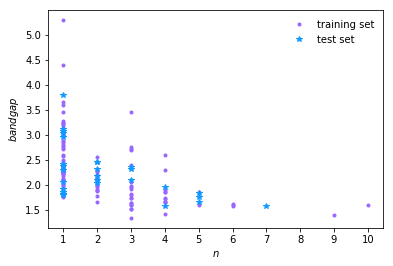

In [14]:
#绘制一个折线图反映训练集和测试集的分布情况
plt.figure()
x1 = Y_train['n'].tolist()
y1 = Y_train['bandgap'].tolist()
x2 = Y_test['n'].tolist()
y2 = Y_test['bandgap'].tolist()
#plt.title("散点图")
plt.plot(x1,y1,".",marker=".",c="#9966ff",label="training set")
plt.plot(x2,y2,".",marker="*",c="#1199ff",label="test set")
plt.xlabel("$n$")
plt.ylabel("$bandgap$")
plt.xticks(range(1,11,1))
plt.legend(loc="upper right",frameon=False)
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(X)
X_std = pd.DataFrame(X_std)
X_std.columns = X.columns
X_std.head()

,n,orientation,A'_MPI,A'_AW,A'_V,A'_R,A'_Rb,A'_ρ,A'_SA,A'_EN,...,X_EI2,X_EI3,X_Tm,X_Tb,X_EV,X_EM,X_EA,X_R,X_RC,X_IR
0,-0.716556,-0.284594,-0.853046,3.029810,1.756239,1.486272,1.486272,2.922672,1.433055,1.320982,...,-0.630281,-0.599929,0.628838,0.631065,0.620468,0.624626,-0.556319,0.613881,0.628007,0.149622
1,-0.716556,-0.284594,-0.912686,0.646105,1.576653,1.360497,1.360497,-0.827699,1.559414,1.424280,...,-0.630281,-0.599929,0.628838,0.631065,0.620468,0.624626,-0.556319,0.613881,0.628007,0.149622
2,-0.099282,-0.284594,-0.640501,0.447352,0.358885,0.417394,0.417394,0.494394,0.295077,0.334981,...,-0.630281,-0.599929,0.628838,0.631065,0.620468,0.624626,-0.556319,0.613881,0.628007,0.149622
3,0.517993,-0.284594,-0.640501,0.447352,0.358885,0.417394,0.417394,0.494394,0.295077,0.334981,...,-0.630281,-0.599929,0.628838,0.631065,0.620468,0.624626,-0.556319,0.613881,0.628007,0.149622
4,1.135267,-0.284594,-0.640501,0.447352,0.358885,0.417394,0.417394,0.494394,0.295077,0.334981,...,-0.630281,-0.599929,0.628838,0.631065,0.620468,0.624626,-0.556319,0.613881,0.628007,0.149622


In [16]:
df2 = X_std.set_index(df1.loc[:,'new ID'])  #增加索引
df2

,n,orientation,A'_MPI,A'_AW,A'_V,A'_R,A'_Rb,A'_ρ,A'_SA,A'_EN,...,X_EI2,X_EI3,X_Tm,X_Tb,X_EV,X_EM,X_EA,X_R,X_RC,X_IR
new ID,,,,,,,,,,,,,,,,,,,,,
67,-0.716556,-0.284594,-0.853046,3.029810,1.756239,1.486272,1.486272,2.922672,1.433055,1.320982,...,-0.630281,-0.599929,0.628838,0.631065,0.620468,0.624626,-0.556319,0.613881,0.628007,0.149622
106,-0.716556,-0.284594,-0.912686,0.646105,1.576653,1.360497,1.360497,-0.827699,1.559414,1.424280,...,-0.630281,-0.599929,0.628838,0.631065,0.620468,0.624626,-0.556319,0.613881,0.628007,0.149622
78,-0.099282,-0.284594,-0.640501,0.447352,0.358885,0.417394,0.417394,0.494394,0.295077,0.334981,...,-0.630281,-0.599929,0.628838,0.631065,0.620468,0.624626,-0.556319,0.613881,0.628007,0.149622
76,0.517993,-0.284594,-0.640501,0.447352,0.358885,0.417394,0.417394,0.494394,0.295077,0.334981,...,-0.630281,-0.599929,0.628838,0.631065,0.620468,0.624626,-0.556319,0.613881,0.628007,0.149622
77,1.135267,-0.284594,-0.640501,0.447352,0.358885,0.417394,0.417394,0.494394,0.295077,0.334981,...,-0.630281,-0.599929,0.628838,0.631065,0.620468,0.624626,-0.556319,0.613881,0.628007,0.149622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,-0.716556,2.428532,-0.063371,-0.790682,-1.384961,-1.374161,-1.374161,1.114923,-1.442399,-1.439899,...,1.066603,0.854580,-1.055125,-1.072931,-0.991953,-1.022656,0.609580,-0.945585,-1.048599,-1.528277
71,-0.716556,-0.284594,-0.796607,0.982922,0.880879,0.843008,0.843008,0.731394,0.826997,0.809206,...,-0.630281,-0.599929,0.628838,0.631065,0.620468,0.624626,-0.556319,0.613881,0.628007,0.149622
72,-0.099282,-0.284594,-0.623565,0.588911,0.271982,0.342858,0.342858,0.981160,0.185049,0.233585,...,-0.630281,-0.599929,0.628838,0.631065,0.620468,0.624626,-0.556319,0.613881,0.628007,0.149622


In [17]:
X_train_std = df2.loc[Y_train['new ID'],:] 
X_train_std

,n,orientation,A'_MPI,A'_AW,A'_V,A'_R,A'_Rb,A'_ρ,A'_SA,A'_EN,...,X_EI2,X_EI3,X_Tm,X_Tb,X_EV,X_EM,X_EA,X_R,X_RC,X_IR
new ID,,,,,,,,,,,,,,,,,,,,,
59,1.135267,-0.284594,-0.854564,0.813610,1.130324,1.034464,1.034464,0.027610,1.066798,1.015077,...,-0.630281,-0.599929,0.628838,0.631065,0.620468,0.624626,-0.556319,0.613881,0.628007,0.149622
82,-0.716556,-0.284594,-0.589856,0.195466,0.476161,0.516223,0.516223,-0.261008,0.222561,0.268289,...,1.066603,0.854580,-1.055125,-1.072931,-0.991953,-1.022656,0.609580,-0.945585,-1.048599,-1.528277
34,-0.716556,-0.284594,0.362702,-1.717966,-2.067723,-2.359296,-2.359296,-0.914284,-2.155913,-2.320235,...,1.707061,1.732822,-1.709227,-1.705825,-1.719492,-1.714848,1.729758,-1.725318,-1.710417,0.451644
74,-0.716556,-0.284594,-0.640501,0.447352,0.358885,0.417394,0.417394,0.494394,0.295077,0.334981,...,1.066603,0.854580,-1.055125,-1.072931,-0.991953,-1.022656,0.609580,-0.945585,-1.048599,-1.528277
24,2.369816,-0.284594,-0.023398,-1.323954,-1.449347,-1.456702,-1.456702,-0.908179,-1.473670,-1.476051,...,-0.630281,-0.599929,0.628838,0.631065,0.620468,0.624626,-0.556319,0.613881,0.628007,0.149622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,-0.716556,-0.284594,-0.126683,-0.313239,-1.190492,-1.133493,-1.133493,2.287157,-1.211340,-1.178165,...,1.066603,0.854580,-1.055125,-1.072931,-0.991953,-1.022656,0.609580,-0.945585,-1.048599,-1.528277
147,0.517993,-0.284594,-0.023398,-1.323954,-1.449347,-1.456702,-1.456702,-0.908179,-1.473670,-1.476051,...,1.066603,0.854580,-1.055125,-1.072931,-0.991953,-1.022656,0.609580,-0.945585,-1.048599,-1.528277
108,-0.099282,-0.284594,1.637056,-0.085852,0.101974,0.193650,0.193650,-0.298750,0.248601,0.292297,...,1.066603,0.854580,-1.055125,-1.072931,-0.991953,-1.022656,0.609580,-0.945585,-1.048599,-1.528277


In [18]:
X_test_std = df2.loc[Y_test['new ID'],:] 
X_test_std

,n,orientation,A'_MPI,A'_AW,A'_V,A'_R,A'_Rb,A'_ρ,A'_SA,A'_EN,...,X_EI2,X_EI3,X_Tm,X_Tb,X_EV,X_EM,X_EA,X_R,X_RC,X_IR
new ID,,,,,,,,,,,,,,,,,,,,,
75,-0.716556,-0.284594,-0.640501,0.447352,0.358885,0.417394,0.417394,0.494394,0.295077,0.334981,...,-0.630281,-0.599929,0.628838,0.631065,0.620468,0.624626,-0.556319,0.613881,0.628007,0.149622
49,-0.716556,-0.284594,-0.854564,0.813610,1.130324,1.034464,1.034464,0.027610,1.066798,1.015077,...,2.347518,2.611063,-2.363329,-2.338719,-2.447031,-2.407039,2.849935,-2.505051,-2.372235,2.431566
44,-0.099282,-0.284594,-0.854564,0.813610,1.130324,1.034464,1.034464,0.027610,1.066798,1.015077,...,-0.630281,-0.599929,0.628838,0.631065,0.620468,0.624626,-0.556319,0.613881,0.628007,0.149622
60,1.752542,-0.284594,-0.854564,0.813610,1.130324,1.034464,1.034464,0.027610,1.066798,1.015077,...,-0.630281,-0.599929,0.628838,0.631065,0.620468,0.624626,-0.556319,0.613881,0.628007,0.149622
169,-0.716556,2.428532,2.068668,-0.479863,-0.493600,-0.369643,-0.369643,-0.222156,-0.374905,-0.302415,...,1.066603,0.854580,-1.055125,-1.072931,-0.991953,-1.022656,0.609580,-0.945585,-1.048599,-1.528277
134,-0.716556,-0.284594,1.637056,-0.085852,0.101974,0.193650,0.193650,-0.298750,0.248601,0.292297,...,-0.630281,-0.599929,0.628838,0.631065,0.620468,0.624626,-0.556319,0.613881,0.628007,0.149622
8,-0.099282,-0.284594,-0.529435,-0.535931,-0.219211,-0.101637,-0.101637,-0.891528,-0.159471,-0.092036,...,1.066603,0.854580,-1.055125,-1.072931,-0.991953,-1.022656,0.609580,-0.945585,-1.048599,-1.528277
95,-0.716556,-0.284594,-0.691551,0.419598,0.517960,0.550975,0.550975,0.159708,0.423000,0.451385,...,1.066603,0.854580,-1.055125,-1.072931,-0.991953,-1.022656,0.609580,-0.945585,-1.048599,-1.528277
61,-0.099282,-0.284594,-0.866556,0.252093,1.009340,0.942490,0.942490,-0.882092,1.142935,1.079493,...,-0.630281,-0.599929,0.628838,0.631065,0.620468,0.624626,-0.556319,0.613881,0.628007,0.149622


In [26]:
Y_train_bdg = Y_train['bandgap']
Y_train_bdg

117    1.85
60     3.24
93     2.12
5      2.79
65     1.61
       ... 
70     3.04
64     2.70
41     2.55
105    2.46
137    2.28
Name: bandgap, Length: 114, dtype: float64

In [20]:
Y_test_bdg = Y_test['bandgap']
Y_test_bdg.to_csv("0311处理结果\\Y_test_bdg.csv")

In [21]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [22]:
import pymrmr

data_std = pd.concat([Y['bandgap'],X_std],axis=1)    #pymrmr.mRMR中第一个参数是数据集，其中第一列是目标变量
mRMR = pymrmr.mRMR(data_std,'MID',76)     #76排名前76的特征变量
mRMR.reverse() #对上述排名列表进行逆序处理
mRMR_reverse=mRMR
X_std_mRMR = X_std[mRMR_reverse]
corr_matrix = X_std_mRMR.corr().abs()#计算x的特征矩阵并取绝对值
lower = corr_matrix.where(np.tril(np.ones(corr_matrix.shape),k = -1).astype(np.bool))#选择相关矩阵的下三角形
to_drop = [column for column in lower.columns if any(lower[column] > 0.9)]##找到相关性大于0.9的特征列的列名
print('删除的特征有：',to_drop)
print('删除的特征数目:',len(to_drop))
X_fea = X_std_mRMR.drop(to_drop,axis=1)#删除特征
X_fea_column = list(X_fea.columns)
X_fea_column.reverse()#恢复mRMR的正序排列
X_fea = X_fea[X_fea_column]#数据按照mRMR正序排列
X_fea

删除的特征有： ["A'_BT", "A'_EN", "A'_SE", 'B_W', "A'_Rb", "A'_DMD", 'A_SA', 'A_Rb', "A'_SA", 'B_Tm', 'A_V', "A'_Ha", 'A_SE', 'A_AW', 'A_R', "A'_NI", 'B_EA', 'A_So', "A'_R", 'A_Ha', 'B_Tb', "A'_VEA", 'B_E(m&b', 'A_ME', 'A_EI', 'A_CP', 'X_EI1', 'X_RC', 'A_VEA', 'X_Tm', "A'_CP", 'A_DMD', 'X_E', 'A_ρ', 'X_Tb', 'X_W', "A'_ME", 'X_EI2', 'X_R', 'A_MPI', 'X_EM', 'X_EV', 'X_EI3', 'A_NI', 'X_E(a&R) ', 'X_E(m&b', 'X_EA']
删除的特征数目: 47


,X_E(p),n,B_EV,A_BT,A'_VIP,X_IR,B_EI1,A'_ρ,A'_EI,B_EI2,...,A'_MPI,A'_So,B_IR,A_EN,A'_AW,B_RC,B_CPM,A'_DM,B_E,B_R
0,-0.635952,-0.716556,1.683585,1.020626,1.552617,0.149622,-0.485706,2.922672,-0.998104,-0.600634,...,-0.853046,0.732619,0.413962,-0.438229,3.029810,-0.902437,0.085961,0.191568,1.082172,-1.506199
1,-0.635952,-0.716556,-0.462868,1.020626,1.675932,0.149622,-0.265949,-0.827699,-0.867990,-0.226854,...,-0.912686,0.301156,-0.096784,-0.438229,0.646105,0.533715,-0.369314,1.061914,-0.571588,0.380398
2,-0.635952,-0.099282,-0.462868,-0.990631,-0.620762,0.149622,-0.265949,0.494394,0.739327,-0.226854,...,-0.640501,1.827871,-0.096784,0.099314,0.447352,0.533715,-0.369314,0.532561,-0.571588,0.380398
3,-0.635952,0.517993,-0.462868,-0.990631,-0.620762,0.149622,-0.265949,0.494394,0.739327,-0.226854,...,-0.640501,1.827871,-0.096784,0.099314,0.447352,0.533715,-0.369314,0.532561,-0.571588,0.380398
4,-0.635952,1.135267,-0.462868,-0.990631,-0.620762,0.149622,-0.265949,0.494394,0.739327,-0.226854,...,-0.640501,1.827871,-0.096784,0.099314,0.447352,0.533715,-0.369314,0.532561,-0.571588,0.380398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,1.113850,-0.716556,-0.462868,1.020626,0.854188,-1.528277,-0.265949,1.114923,0.159028,-0.226854,...,-0.063371,-0.418640,-0.096784,-0.438229,-0.790682,0.533715,-0.369314,-0.966844,-0.571588,0.380398
139,-0.635952,-0.716556,-0.462868,1.020626,1.524047,0.149622,-0.265949,0.731394,-0.887904,-0.226854,...,-0.796607,0.989837,-0.096784,-0.438229,0.982922,0.533715,-0.369314,1.045066,-0.571588,0.380398
140,-0.635952,-0.099282,-0.462868,-0.990631,-0.598121,0.149622,-0.265949,0.981160,0.556804,-0.226854,...,-0.623565,1.686815,-0.096784,0.099314,0.588911,0.533715,-0.369314,0.211826,-0.571588,0.380398
141,-0.635952,0.517993,-0.462868,-0.990631,-0.598121,0.149622,-0.265949,0.981160,0.556804,-0.226854,...,-0.623565,1.686815,-0.096784,0.099314,0.588911,0.533715,-0.369314,0.211826,-0.571588,0.380398


In [23]:
X_fea = X_fea.set_index(df1.loc[:,'new ID']) 
X_fea

,X_E(p),n,B_EV,A_BT,A'_VIP,X_IR,B_EI1,A'_ρ,A'_EI,B_EI2,...,A'_MPI,A'_So,B_IR,A_EN,A'_AW,B_RC,B_CPM,A'_DM,B_E,B_R
new ID,,,,,,,,,,,,,,,,,,,,,
67,-0.635952,-0.716556,1.683585,1.020626,1.552617,0.149622,-0.485706,2.922672,-0.998104,-0.600634,...,-0.853046,0.732619,0.413962,-0.438229,3.029810,-0.902437,0.085961,0.191568,1.082172,-1.506199
106,-0.635952,-0.716556,-0.462868,1.020626,1.675932,0.149622,-0.265949,-0.827699,-0.867990,-0.226854,...,-0.912686,0.301156,-0.096784,-0.438229,0.646105,0.533715,-0.369314,1.061914,-0.571588,0.380398
78,-0.635952,-0.099282,-0.462868,-0.990631,-0.620762,0.149622,-0.265949,0.494394,0.739327,-0.226854,...,-0.640501,1.827871,-0.096784,0.099314,0.447352,0.533715,-0.369314,0.532561,-0.571588,0.380398
76,-0.635952,0.517993,-0.462868,-0.990631,-0.620762,0.149622,-0.265949,0.494394,0.739327,-0.226854,...,-0.640501,1.827871,-0.096784,0.099314,0.447352,0.533715,-0.369314,0.532561,-0.571588,0.380398
77,-0.635952,1.135267,-0.462868,-0.990631,-0.620762,0.149622,-0.265949,0.494394,0.739327,-0.226854,...,-0.640501,1.827871,-0.096784,0.099314,0.447352,0.533715,-0.369314,0.532561,-0.571588,0.380398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1.113850,-0.716556,-0.462868,1.020626,0.854188,-1.528277,-0.265949,1.114923,0.159028,-0.226854,...,-0.063371,-0.418640,-0.096784,-0.438229,-0.790682,0.533715,-0.369314,-0.966844,-0.571588,0.380398
71,-0.635952,-0.716556,-0.462868,1.020626,1.524047,0.149622,-0.265949,0.731394,-0.887904,-0.226854,...,-0.796607,0.989837,-0.096784,-0.438229,0.982922,0.533715,-0.369314,1.045066,-0.571588,0.380398
72,-0.635952,-0.099282,-0.462868,-0.990631,-0.598121,0.149622,-0.265949,0.981160,0.556804,-0.226854,...,-0.623565,1.686815,-0.096784,0.099314,0.588911,0.533715,-0.369314,0.211826,-0.571588,0.380398


In [24]:
X_train_fea = X_fea.loc[Y_train['new ID'],:] 
X_train_fea.to_csv('0311处理结果\\X_train_fea.csv')

In [25]:
X_test_fea = X_fea.loc[Y_test['new ID'],:] 
X_test_fea.to_csv('0311处理结果\\X_test_fea.csv')

In [13]:
models=[KNeighborsRegressor(),SVR(),Ridge(),MLPRegressor(alpha=20),DecisionTreeRegressor(),RandomForestRegressor(),CatBoostRegressor(),XGBRegressor()]
models_name=['KNN','SVR','Ridge','MLP','DT','RF','CatBoost','XGBoost']

模型： KNN
训练集相关系数R: 0.8777
训练集均方根误差RMSE: 0.3018
平均绝对误差MAE 0.2064
拟合优度r2 0.7656
测试集相关系数: 0.8343
测试集均方根误差: 0.2928
平均绝对误差MAE 0.2354
拟合优度r2: 0.6823


C:\Users\shenyushu\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\shenyushu\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


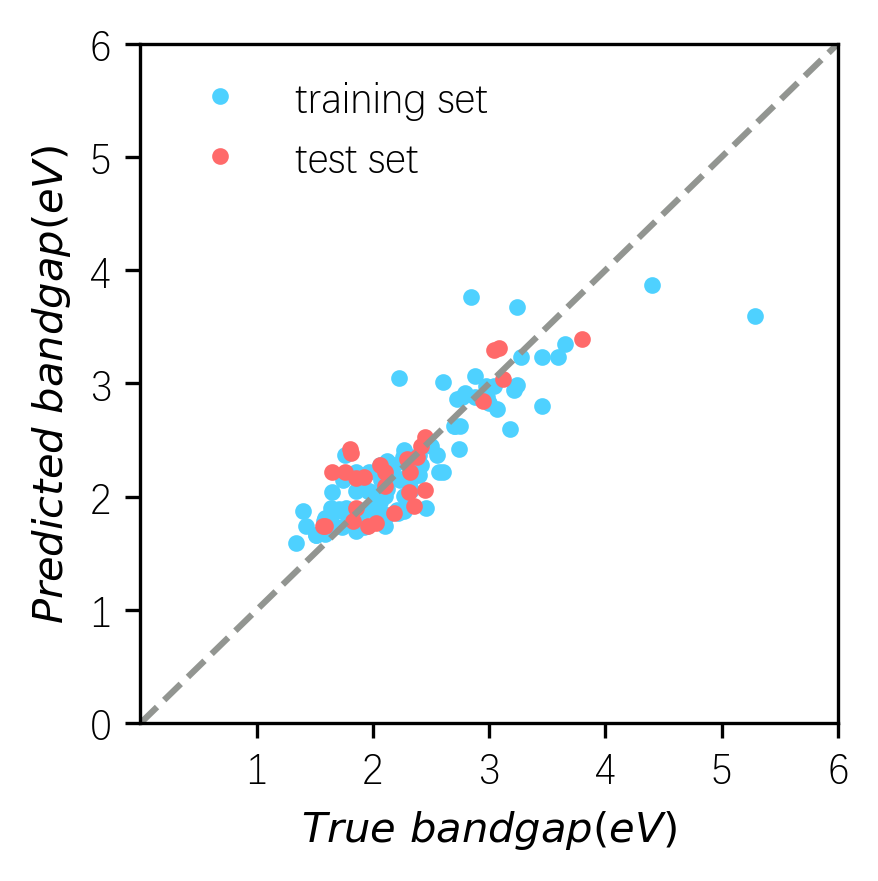

模型： SVR
训练集相关系数R: 0.9532
训练集均方根误差RMSE: 0.2034
平均绝对误差MAE 0.1245
拟合优度r2 0.8936
测试集相关系数: 0.9418
测试集均方根误差: 0.1781
平均绝对误差MAE 0.1475
拟合优度r2: 0.8825


C:\Users\shenyushu\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\shenyushu\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\shenyushu\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


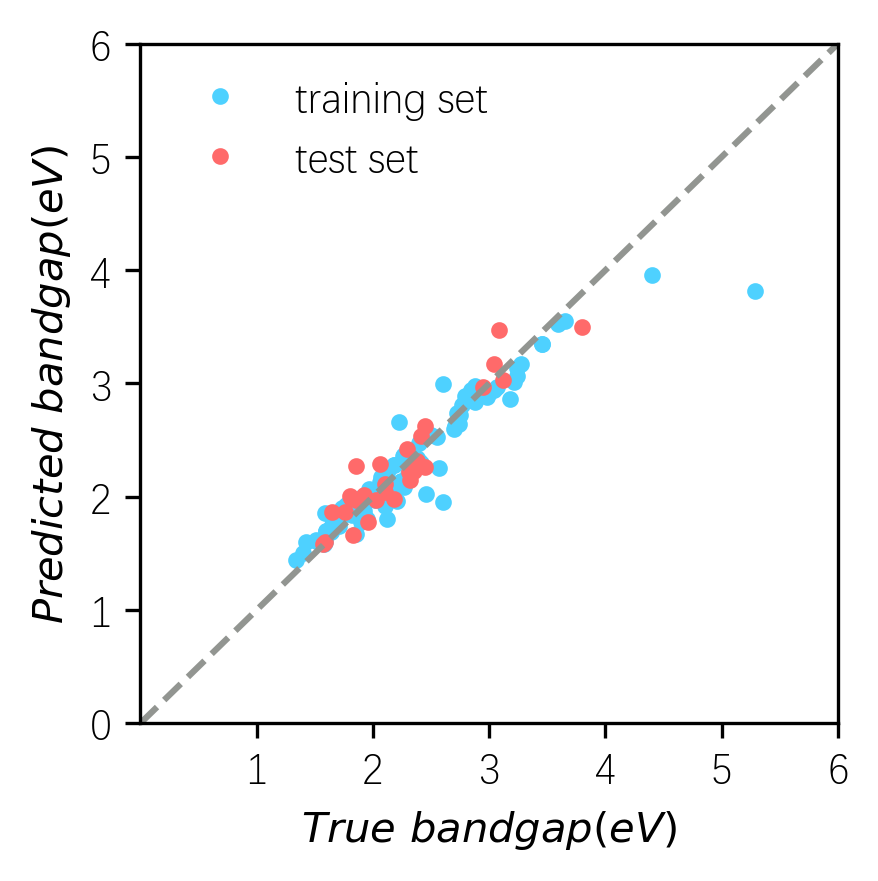

模型： Ridge
训练集相关系数R: 0.9165
训练集均方根误差RMSE: 0.2494
平均绝对误差MAE 0.1663
拟合优度r2 0.84
测试集相关系数: 0.9507
测试集均方根误差: 0.1638
平均绝对误差MAE 0.1261
拟合优度r2: 0.9006


C:\Users\shenyushu\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\shenyushu\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


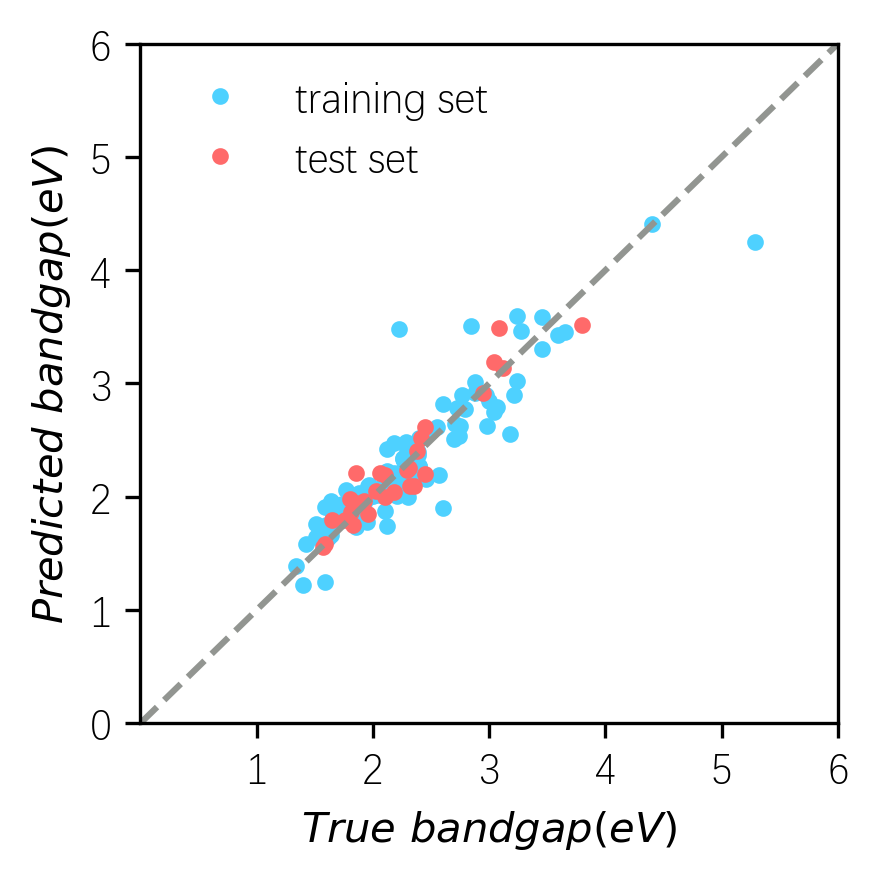

模型： MLP


C:\Users\shenyushu\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\shenyushu\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\shenyushu\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


训练集相关系数R: 0.9484
训练集均方根误差RMSE: 0.2149
平均绝对误差MAE 0.159
拟合优度r2 0.8812
测试集相关系数: 0.9163
测试集均方根误差: 0.2277
平均绝对误差MAE 0.1819
拟合优度r2: 0.8079


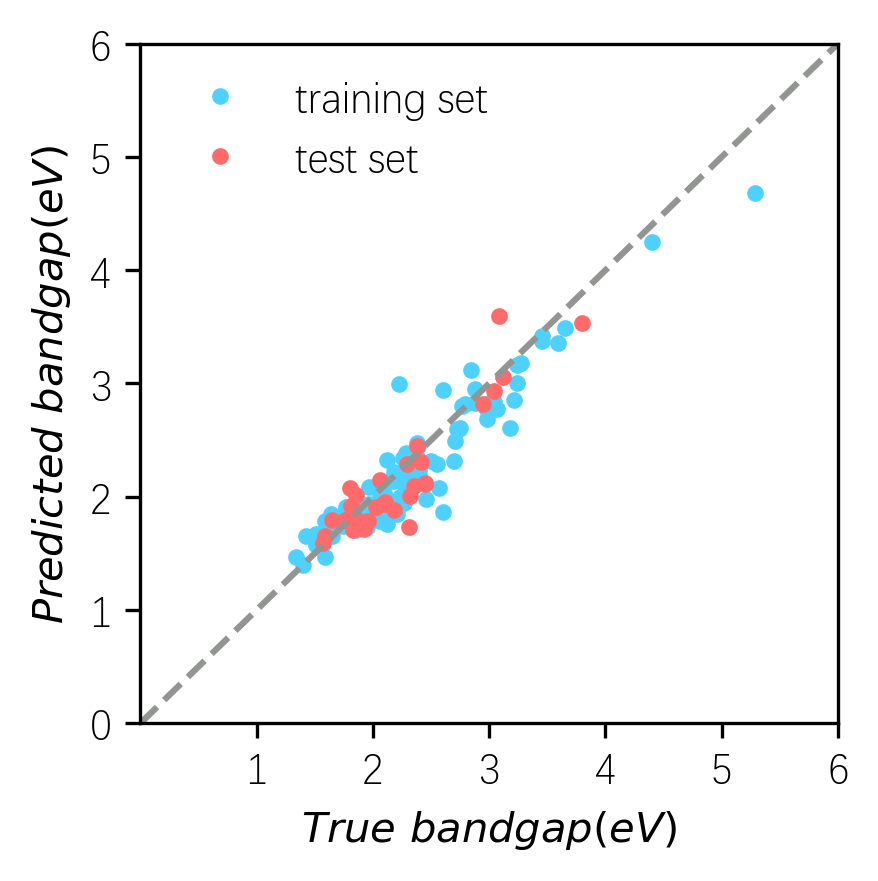

模型： DT
训练集相关系数R: 0.9968
训练集均方根误差RMSE: 0.0497
平均绝对误差MAE 0.0066
拟合优度r2 0.9937
测试集相关系数: 0.8871
测试集均方根误差: 0.2733
平均绝对误差MAE 0.2121
拟合优度r2: 0.7232


C:\Users\shenyushu\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\shenyushu\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


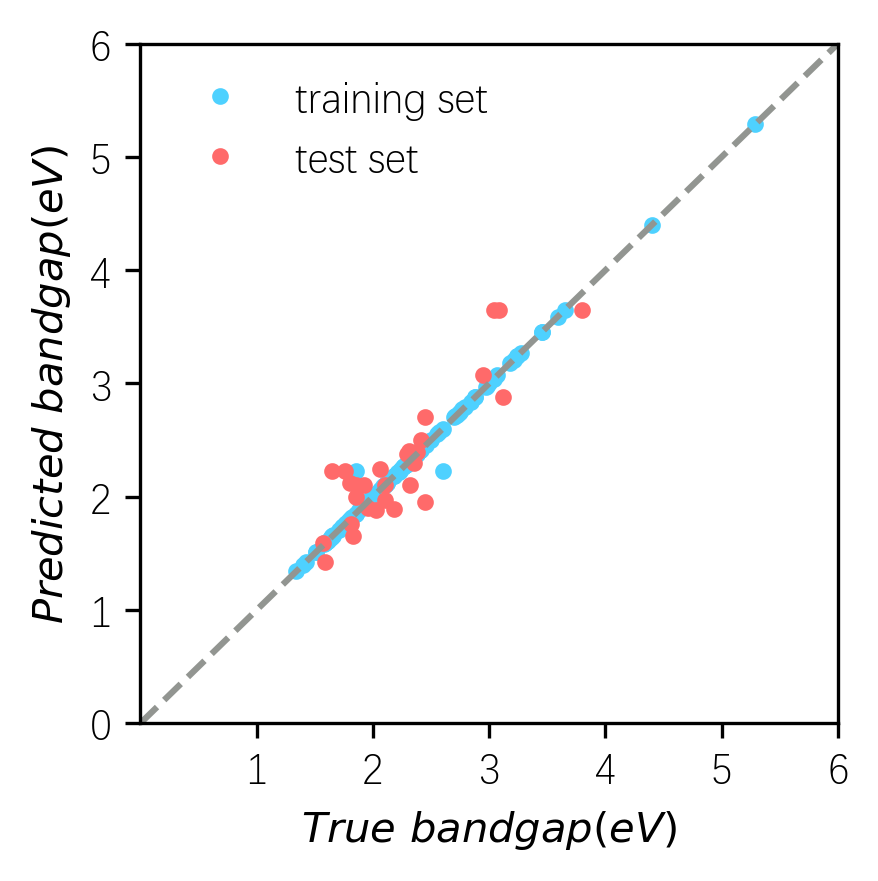

模型： RF
训练集相关系数R: 0.971
训练集均方根误差RMSE: 0.1598
平均绝对误差MAE 0.091
拟合优度r2 0.9343
测试集相关系数: 0.8347
测试集均方根误差: 0.3111
平均绝对误差MAE 0.2422
拟合优度r2: 0.6414


C:\Users\shenyushu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\shenyushu\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\shenyushu\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use 

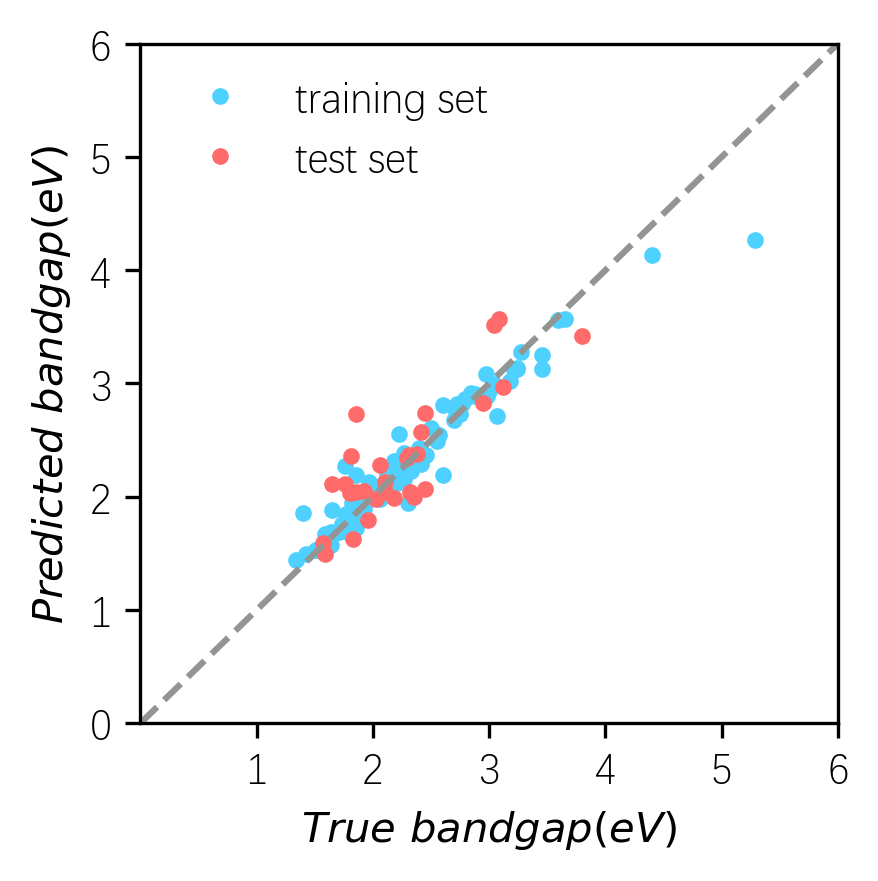

模型： CatBoost
0:	learn: 2.3127932	total: 148ms	remaining: 2m 27s
1:	learn: 2.2547534	total: 160ms	remaining: 1m 19s
2:	learn: 2.2033858	total: 181ms	remaining: 60s
3:	learn: 2.1475202	total: 199ms	remaining: 49.6s
4:	learn: 2.0952334	total: 224ms	remaining: 44.6s
5:	learn: 2.0405642	total: 240ms	remaining: 39.7s
6:	learn: 1.9919313	total: 261ms	remaining: 37.1s
7:	learn: 1.9476184	total: 283ms	remaining: 35.1s
8:	learn: 1.9016133	total: 305ms	remaining: 33.6s
9:	learn: 1.8577859	total: 326ms	remaining: 32.3s
10:	learn: 1.8113306	total: 340ms	remaining: 30.6s
11:	learn: 1.7643883	total: 347ms	remaining: 28.6s
12:	learn: 1.7266494	total: 367ms	remaining: 27.9s
13:	learn: 1.6845179	total: 384ms	remaining: 27.1s
14:	learn: 1.6455719	total: 406ms	remaining: 26.7s
15:	learn: 1.6091156	total: 432ms	remaining: 26.6s
16:	learn: 1.5759700	total: 448ms	remaining: 25.9s
17:	learn: 1.5406790	total: 465ms	remaining: 25.3s
18:	learn: 1.5016829	total: 470ms	remaining: 24.3s
19:	learn: 1.4707429	total: 

162:	learn: 0.2978213	total: 2.97s	remaining: 15.2s
163:	learn: 0.2972222	total: 2.98s	remaining: 15.2s
164:	learn: 0.2958376	total: 3s	remaining: 15.2s
165:	learn: 0.2954179	total: 3.01s	remaining: 15.1s
166:	learn: 0.2949269	total: 3.02s	remaining: 15.1s
167:	learn: 0.2945792	total: 3.03s	remaining: 15s
168:	learn: 0.2938482	total: 3.04s	remaining: 14.9s
169:	learn: 0.2932616	total: 3.05s	remaining: 14.9s
170:	learn: 0.2920945	total: 3.07s	remaining: 14.9s
171:	learn: 0.2913019	total: 3.08s	remaining: 14.8s
172:	learn: 0.2908311	total: 3.09s	remaining: 14.8s
173:	learn: 0.2903632	total: 3.11s	remaining: 14.8s
174:	learn: 0.2900307	total: 3.12s	remaining: 14.7s
175:	learn: 0.2893761	total: 3.13s	remaining: 14.7s
176:	learn: 0.2884823	total: 3.15s	remaining: 14.6s
177:	learn: 0.2878891	total: 3.16s	remaining: 14.6s
178:	learn: 0.2870400	total: 3.18s	remaining: 14.6s
179:	learn: 0.2865901	total: 3.19s	remaining: 14.5s
180:	learn: 0.2857916	total: 3.21s	remaining: 14.5s
181:	learn: 0.285

327:	learn: 0.2507750	total: 5.55s	remaining: 11.4s
328:	learn: 0.2507211	total: 5.57s	remaining: 11.4s
329:	learn: 0.2506996	total: 5.58s	remaining: 11.3s
330:	learn: 0.2505434	total: 5.59s	remaining: 11.3s
331:	learn: 0.2504600	total: 5.61s	remaining: 11.3s
332:	learn: 0.2503634	total: 5.63s	remaining: 11.3s
333:	learn: 0.2503112	total: 5.65s	remaining: 11.3s
334:	learn: 0.2502725	total: 5.66s	remaining: 11.2s
335:	learn: 0.2502615	total: 5.68s	remaining: 11.2s
336:	learn: 0.2501721	total: 5.7s	remaining: 11.2s
337:	learn: 0.2501295	total: 5.72s	remaining: 11.2s
338:	learn: 0.2500592	total: 5.74s	remaining: 11.2s
339:	learn: 0.2500551	total: 5.75s	remaining: 11.2s
340:	learn: 0.2499630	total: 5.76s	remaining: 11.1s
341:	learn: 0.2499493	total: 5.78s	remaining: 11.1s
342:	learn: 0.2499095	total: 5.79s	remaining: 11.1s
343:	learn: 0.2498331	total: 5.8s	remaining: 11.1s
344:	learn: 0.2497381	total: 5.81s	remaining: 11s
345:	learn: 0.2497214	total: 5.83s	remaining: 11s
346:	learn: 0.2496

488:	learn: 0.2374618	total: 8.18s	remaining: 8.54s
489:	learn: 0.2374028	total: 8.2s	remaining: 8.54s
490:	learn: 0.2368454	total: 8.22s	remaining: 8.52s
491:	learn: 0.2368020	total: 8.24s	remaining: 8.51s
492:	learn: 0.2367818	total: 8.25s	remaining: 8.48s
493:	learn: 0.2367585	total: 8.28s	remaining: 8.48s
494:	learn: 0.2367161	total: 8.29s	remaining: 8.46s
495:	learn: 0.2367114	total: 8.33s	remaining: 8.46s
496:	learn: 0.2365884	total: 8.36s	remaining: 8.46s
497:	learn: 0.2365879	total: 8.37s	remaining: 8.44s
498:	learn: 0.2365811	total: 8.39s	remaining: 8.43s
499:	learn: 0.2363502	total: 8.41s	remaining: 8.41s
500:	learn: 0.2362795	total: 8.44s	remaining: 8.41s
501:	learn: 0.2362290	total: 8.47s	remaining: 8.4s
502:	learn: 0.2362217	total: 8.48s	remaining: 8.38s
503:	learn: 0.2362215	total: 8.49s	remaining: 8.36s
504:	learn: 0.2361756	total: 8.51s	remaining: 8.34s
505:	learn: 0.2361653	total: 8.54s	remaining: 8.34s
506:	learn: 0.2361423	total: 8.56s	remaining: 8.32s
507:	learn: 0.

654:	learn: 0.2224357	total: 11.4s	remaining: 6.02s
655:	learn: 0.2224158	total: 11.4s	remaining: 6s
656:	learn: 0.2224149	total: 11.5s	remaining: 5.98s
657:	learn: 0.2224123	total: 11.5s	remaining: 5.96s
658:	learn: 0.2223762	total: 11.5s	remaining: 5.94s
659:	learn: 0.2223754	total: 11.5s	remaining: 5.92s
660:	learn: 0.2223668	total: 11.5s	remaining: 5.9s
661:	learn: 0.2223660	total: 11.5s	remaining: 5.88s
662:	learn: 0.2223632	total: 11.5s	remaining: 5.86s
663:	learn: 0.2223516	total: 11.5s	remaining: 5.84s
664:	learn: 0.2223254	total: 11.6s	remaining: 5.82s
665:	learn: 0.2223133	total: 11.6s	remaining: 5.8s
666:	learn: 0.2222769	total: 11.6s	remaining: 5.79s
667:	learn: 0.2222526	total: 11.6s	remaining: 5.77s
668:	learn: 0.2222474	total: 11.6s	remaining: 5.75s
669:	learn: 0.2222221	total: 11.6s	remaining: 5.74s
670:	learn: 0.2222216	total: 11.7s	remaining: 5.71s
671:	learn: 0.2221722	total: 11.7s	remaining: 5.7s
672:	learn: 0.2220611	total: 11.7s	remaining: 5.68s
673:	learn: 0.2220

822:	learn: 0.2149547	total: 14.3s	remaining: 3.07s
823:	learn: 0.2149504	total: 14.3s	remaining: 3.05s
824:	learn: 0.2149382	total: 14.3s	remaining: 3.04s
825:	learn: 0.2149279	total: 14.3s	remaining: 3.02s
826:	learn: 0.2147392	total: 14.4s	remaining: 3s
827:	learn: 0.2146817	total: 14.4s	remaining: 2.98s
828:	learn: 0.2146723	total: 14.4s	remaining: 2.97s
829:	learn: 0.2146538	total: 14.4s	remaining: 2.95s
830:	learn: 0.2146197	total: 14.4s	remaining: 2.93s
831:	learn: 0.2146193	total: 14.4s	remaining: 2.91s
832:	learn: 0.2143474	total: 14.4s	remaining: 2.9s
833:	learn: 0.2143422	total: 14.5s	remaining: 2.88s
834:	learn: 0.2143309	total: 14.5s	remaining: 2.86s
835:	learn: 0.2143280	total: 14.5s	remaining: 2.84s
836:	learn: 0.2142627	total: 14.5s	remaining: 2.83s
837:	learn: 0.2142284	total: 14.5s	remaining: 2.81s
838:	learn: 0.2141974	total: 14.6s	remaining: 2.79s
839:	learn: 0.2141945	total: 14.6s	remaining: 2.78s
840:	learn: 0.2141701	total: 14.6s	remaining: 2.76s
841:	learn: 0.21

988:	learn: 0.2082678	total: 17.2s	remaining: 191ms
989:	learn: 0.2082415	total: 17.2s	remaining: 174ms
990:	learn: 0.2082380	total: 17.2s	remaining: 156ms
991:	learn: 0.2082275	total: 17.2s	remaining: 139ms
992:	learn: 0.2082155	total: 17.3s	remaining: 122ms
993:	learn: 0.2081514	total: 17.3s	remaining: 104ms
994:	learn: 0.2081334	total: 17.3s	remaining: 87ms
995:	learn: 0.2081309	total: 17.3s	remaining: 69.7ms
996:	learn: 0.2081290	total: 17.4s	remaining: 52.2ms
997:	learn: 0.2081258	total: 17.4s	remaining: 34.8ms
998:	learn: 0.2080952	total: 17.4s	remaining: 17.4ms
999:	learn: 0.2080718	total: 17.4s	remaining: 0us
训练集相关系数R: 0.9437
训练集均方根误差RMSE: 0.2081
平均绝对误差MAE 0.1257
拟合优度r2 0.8886
测试集相关系数: 0.9299
测试集均方根误差: 0.1935
平均绝对误差MAE 0.1506
拟合优度r2: 0.8612


C:\Users\shenyushu\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\shenyushu\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


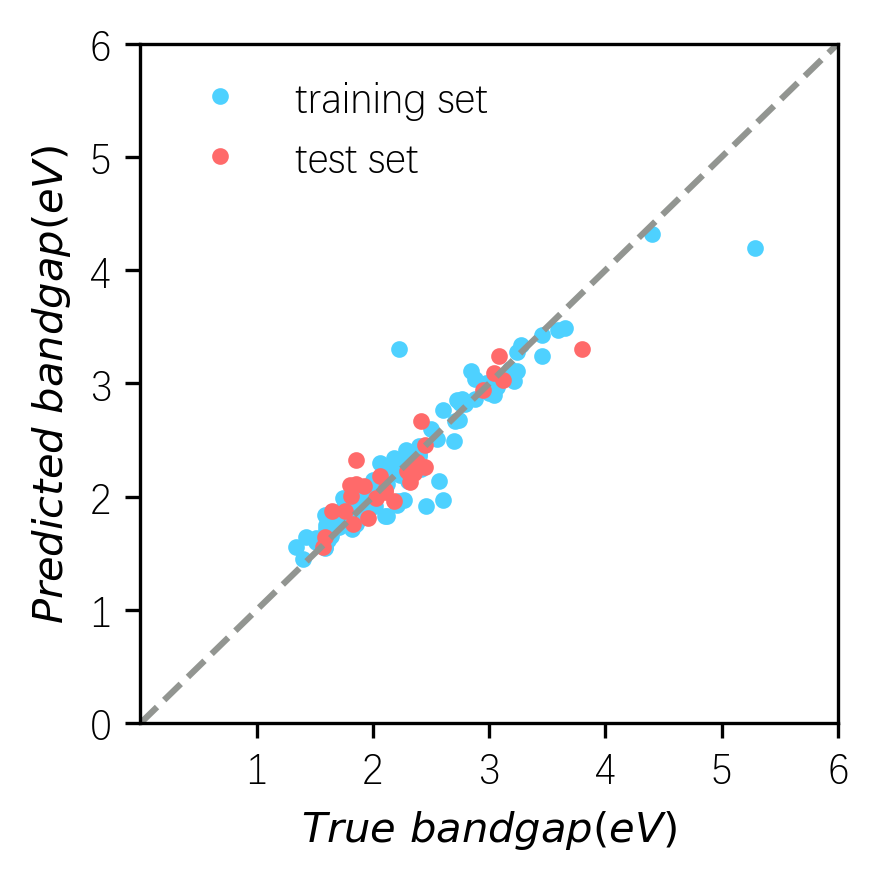

模型： XGBoost
[18:46:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
训练集相关系数R: 0.9877
训练集均方根误差RMSE: 0.0997
平均绝对误差MAE 0.0691
拟合优度r2 0.9744
测试集相关系数: 0.9477
测试集均方根误差: 0.168
平均绝对误差MAE 0.1424
拟合优度r2: 0.8954


C:\Users\shenyushu\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\shenyushu\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


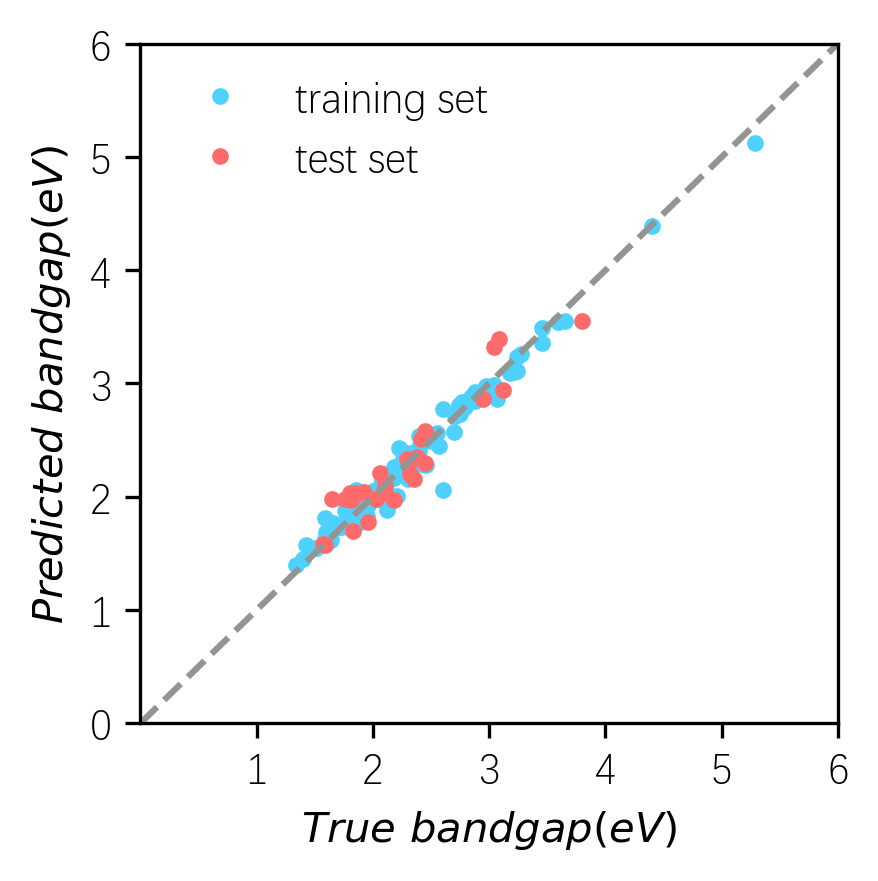

In [19]:
train_R = []
train_RMSE = []
    
test_R = []
test_RMSE = []

#zip,将里面的值逐一传递给外面
for name,model in zip(models_name,models):
    
    print('模型：',name)
    model = model   #建立模型
    model.fit(X_train_std,Y_train_bdg)
    
    Y_train_pred = model.predict(X_train_std)
    Y_test_pred = model.predict(X_test_std)
    
    #对训练集的分析
    R_train = round(np.corrcoef(Y_train_bdg, Y_train_pred)[0][1],4)
    RMSE_train = round(np.sqrt(mean_squared_error(Y_train_bdg,Y_train_pred)),4)
    MAE_train = round(mean_absolute_error(Y_train_bdg,Y_train_pred),4)
    r2_train = round(r2_score(Y_train_bdg,Y_train_pred),4)
    print('训练集相关系数R:',R_train)
    print('训练集均方根误差RMSE:',RMSE_train)
    print('平均绝对误差MAE',MAE_train)
    print('拟合优度r2',r2_train)
    
    #对测试分析
    R_test = round(np.corrcoef(Y_test_bdg, Y_test_pred)[0][1],4)
    RMSE_test = round(np.sqrt(mean_squared_error(Y_test_bdg, Y_test_pred)),4)
    MAE_test = round(mean_absolute_error(Y_test_bdg,Y_test_pred),4)
    r2_test = round(r2_score(Y_test_bdg,Y_test_pred),4)
    print('测试集相关系数:',R_test)
    print('测试集均方根误差:',RMSE_test)
    print('平均绝对误差MAE',MAE_test)
    print('拟合优度r2:',r2_test)
    
    train_R.append(R_train)
    train_RMSE.append(RMSE_train)
    
    test_R.append(R_test)
    test_RMSE.append(RMSE_test)
    
    #绘制训练集和测试集的图表，观察其预测情况
    plt.figure(figsize=(3,3),dpi=300)
    #plt.title(name)
    plt.plot(Y_train_bdg,Y_train_pred,".",c = '#4ed1ff',alpha = 1,label="training set")
    plt.plot(Y_test_bdg,Y_test_pred,".",c = '#ff6a6a',alpha = 1,label="test set")  
    plt.xlabel(r'$True\ bandgap(eV)$')
    plt.ylabel(r'$Predicted\ bandgap(eV)$')
    plt.plot([0,6],[0,6],'--',c = '#929591')
    plt.xlim(0,6)
    plt.xticks(range(1,7,1))  #设置一下横轴   fontsize=20
    plt.ylim(0,6)
    plt.legend(frameon=False)   #去掉图注的边框
    plt.show()

In [20]:
train_R

[0.8777, 0.9532, 0.9165, 0.9484, 0.9968, 0.971, 0.9437, 0.9877]

In [21]:
test_R

[0.8343, 0.9418, 0.9507, 0.9163, 0.8871, 0.8347, 0.9299, 0.9477]

In [22]:
train_RMSE

[0.3018, 0.2034, 0.2494, 0.2149, 0.0497, 0.1598, 0.2081, 0.0997]

In [23]:
test_RMSE

[0.2928, 0.1781, 0.1638, 0.2277, 0.2733, 0.3111, 0.1935, 0.168]

# 依据预测结果的RMSE筛选变量

In [24]:
from sklearn.metrics import mean_squared_error
n = X_train_fea.values.shape[1]
R_= []
RMSE_ = []

for i in range(1,X_train_fea.shape[1]+1):
    x_fea_train = X_train_fea.iloc[:,: i]#训练集依次提取不同数量的特征
    x_fea_test = X_test_fea.iloc[:,: i]
    xgb = XGBRegressor()
    xgb.fit(x_fea_train, Y_train_bdg)
    #verbose 为迭代多少次显示一次训练错误
    y_pred_test = xgb.predict(x_fea_test)
    R_test = round((np.corrcoef(Y_test_bdg, y_pred_test))[0][1],4)
    RMSE_test = round(np.sqrt(mean_squared_error(Y_test_bdg, y_pred_test)),4)
    R_.append(R_test)
    RMSE_.append(RMSE_test)
print('R:',R_)
print('RMSE:',RMSE_)

[18:47:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:47:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:47:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:47:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:47:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:47:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:47:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:47:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:47:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

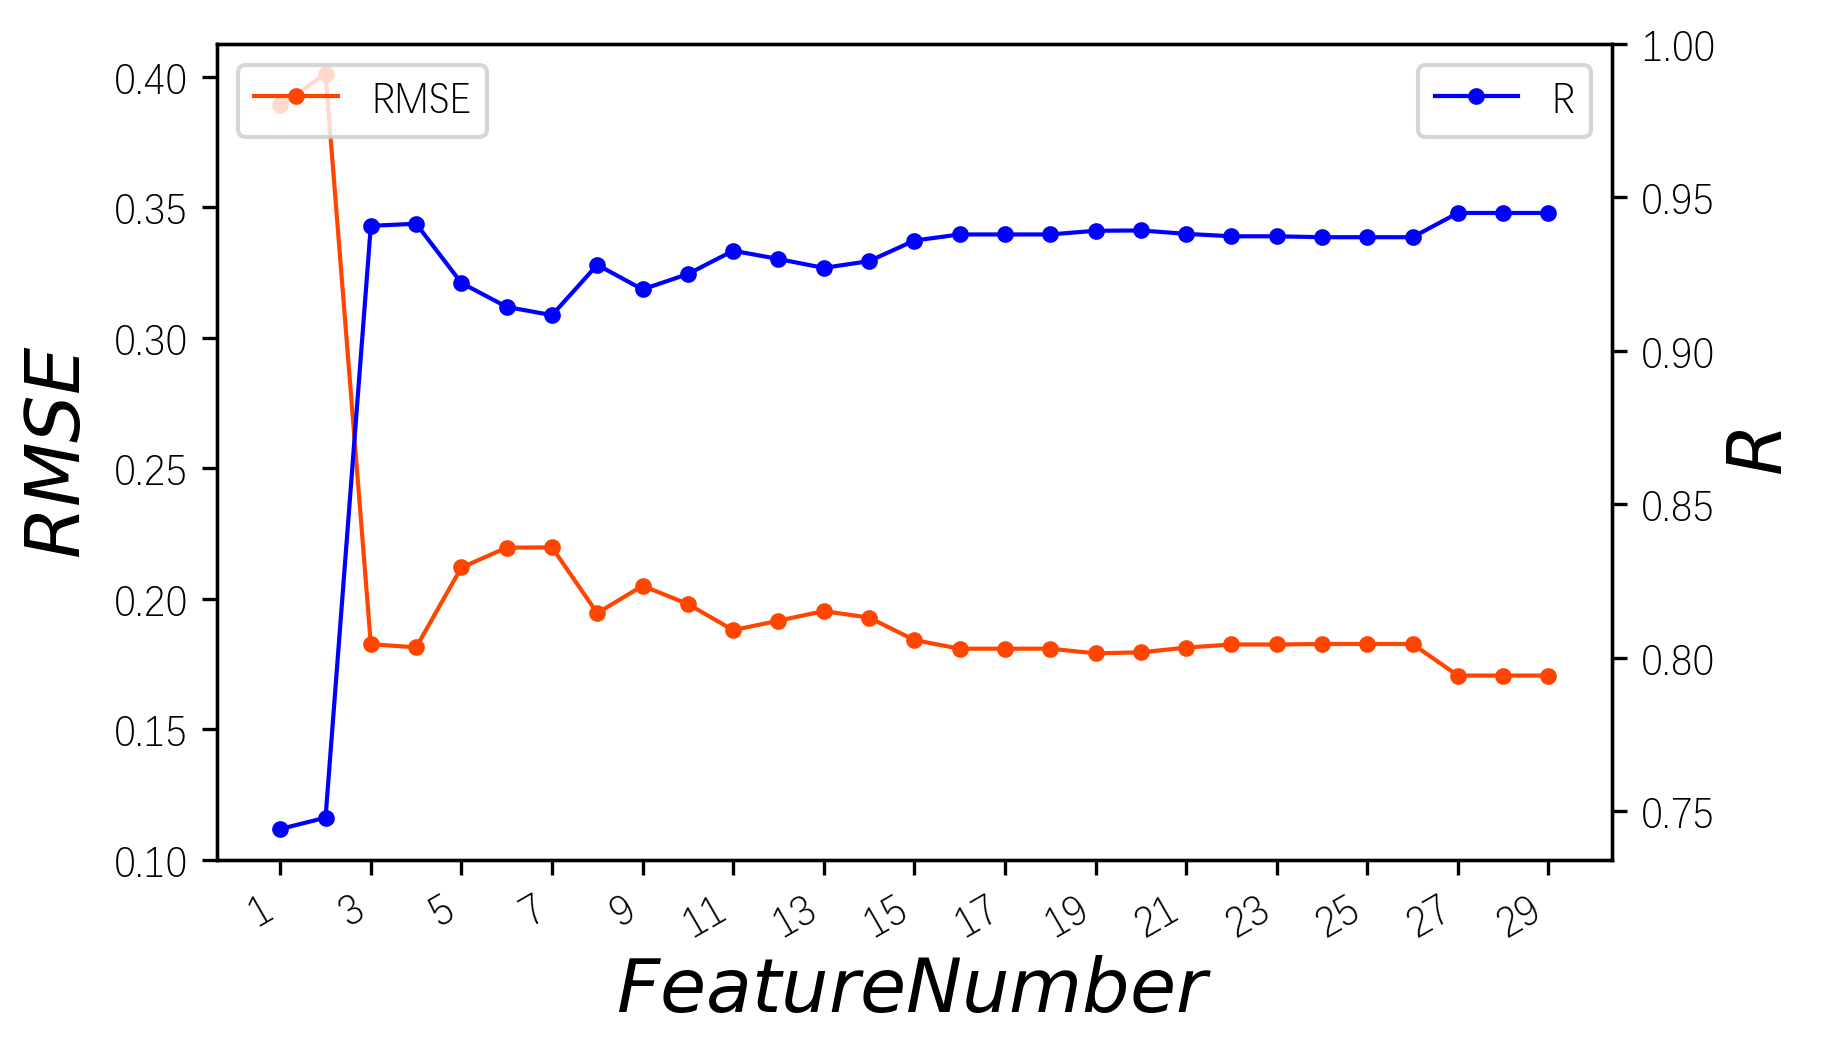

In [25]:
plt.rcParams['savefig.dpi'] = 300  #像素
plt.rcParams['figure.dpi'] = 300    #分辨率

number = [i for i in range(1,n+1)]

fig, ax1 = plt.subplots() # 使用subplots()创建窗口
x_ticks = np.arange(1, 40, 2)
plt.xticks(x_ticks)
ax1.plot(number, RMSE_,'.-', c='orangered',label='RMSE', linewidth = 1) 
#绘制折线图像1,圆形点，标签，线宽
plt.legend(loc=2)
ax2 = ax1.twinx() 
# 创建第二个坐标轴
ax2.plot(number, R_, '.-', c='blue',label='R', linewidth = 1) #同上
plt.legend(loc=1)

ax1.set_xlabel(r'$Feature Number$', size=18)
#plt.xticks(rotation=90)
ax1.set_ylabel(r'$RMSE$', size=18)
ax1.set_yticks(np.arange(0.1,0.45,0.05))
ax2.set_ylabel(r'$R$', size=18)
ax2.set_yticks(np.arange(0.75,1.03,0.05))
plt.gcf().autofmt_xdate()
#自动适应刻度线密度，包括x轴，y轴
plt.show()

C:\Users\shenyushu\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\shenyushu\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\shenyushu\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\shenyushu\Anaconda3\lib\site-packages\sklearn\svm\base.py:

R: [0.7157, 0.7238, 0.8958, 0.8925, 0.8784, 0.8662, 0.9312, 0.9143, 0.8689, 0.8941, 0.8988, 0.9052, 0.9064, 0.9236, 0.9396, 0.9374, 0.9386, 0.9403, 0.9409, 0.9442, 0.9425, 0.9432, 0.9438, 0.9423, 0.9429, 0.945, 0.9453, 0.9441, 0.9417]
RMSE: [0.3941, 0.4027, 0.2358, 0.2427, 0.2537, 0.2635, 0.1947, 0.2115, 0.2575, 0.2329, 0.2279, 0.2213, 0.2196, 0.1999, 0.1789, 0.1815, 0.1799, 0.1776, 0.1767, 0.1726, 0.1757, 0.1747, 0.1741, 0.1761, 0.1748, 0.1719, 0.171, 0.1725, 0.1756]


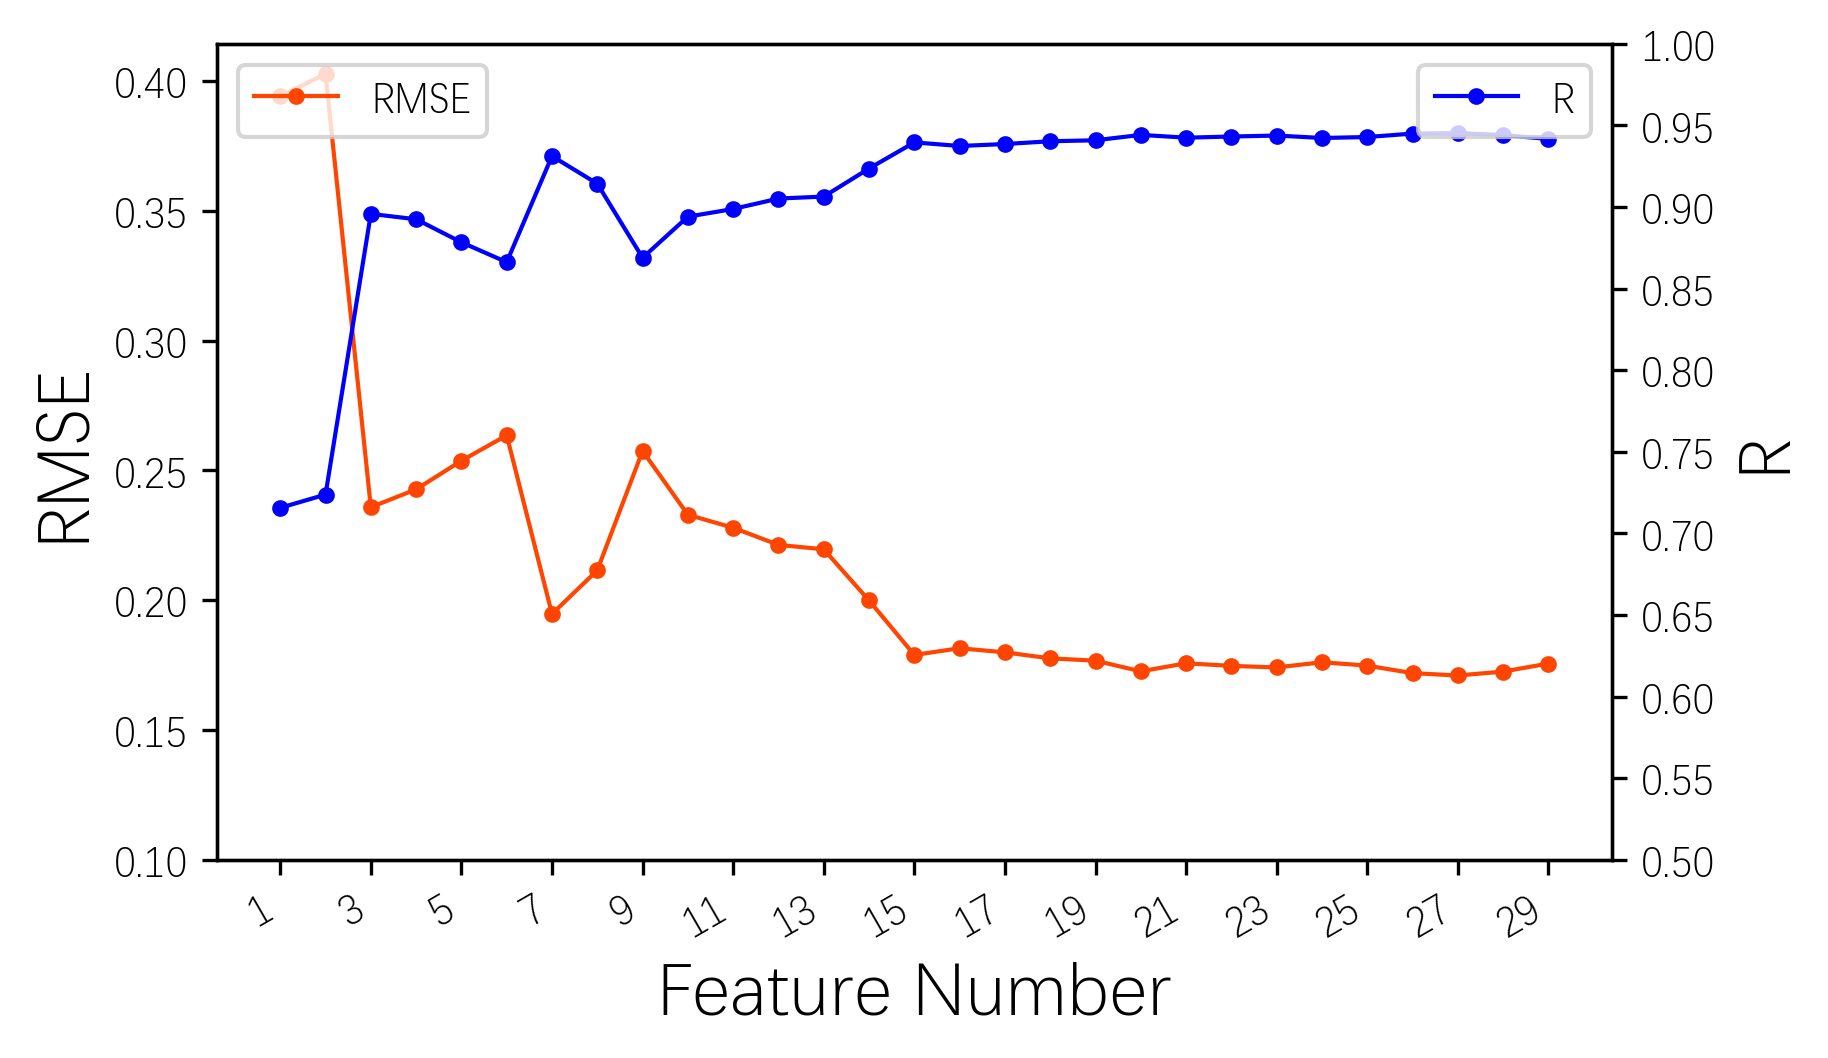

In [26]:
# 然后进行SVR算法

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
n = X_train_fea.values.shape[1]
R_= []
RMSE_ = []

for i in range(1,X_train_fea.shape[1]+1):
    x_fea_train = X_train_fea.iloc[:,: i]#训练集依次提取不同数量的特征
    x_fea_test = X_test_fea.iloc[:,: i]
    RE = SVR()
    RE.fit(x_fea_train, Y_train_bdg)
    y_pred_test = RE.predict(x_fea_test)
    R_test = round((np.corrcoef(Y_test_bdg, y_pred_test))[0][1],4)
    RMSE_test = round(np.sqrt(mean_squared_error(Y_test_bdg, y_pred_test)),4)
    R_.append(R_test)
    RMSE_.append(RMSE_test)
print('R:',R_)
print('RMSE:',RMSE_)

plt.rcParams['savefig.dpi'] = 300  #像素
plt.rcParams['figure.dpi'] = 300    #分辨率

number = [i for i in range(1,n+1)]

fig, ax1 = plt.subplots() # 使用subplots()创建窗口
x_ticks = np.arange(1, 40, 2)
plt.xticks(x_ticks)
ax1.plot(number, RMSE_,'.-', c='orangered',label='RMSE', linewidth = 1) 
#绘制折线图像1,圆形点，标签，线宽
plt.legend(loc=2)
ax2 = ax1.twinx() 
# 创建第二个坐标轴
ax2.plot(number, R_, '.-', c='blue',label='R', linewidth = 1) #同上
plt.legend(loc=1)

ax1.set_xlabel('Feature Number', size=18)
ax1.set_ylabel('RMSE', size=18)
ax1.set_yticks(np.arange(0.1,0.45,0.05))
ax2.set_ylabel('R', size=18)
ax2.set_yticks(np.arange(0.5,1.03,0.05))
plt.gcf().autofmt_xdate()
#自动适应刻度线密度，包括x轴，y轴
plt.show()

# 依据留一法交叉验证的结果进行筛选

In [27]:
from sklearn.model_selection import cross_val_predict

In [33]:
# 然后进行SVM算法
from sklearn.metrics import mean_squared_error
n = X_train_fea.values.shape[1]
R_= []
RMSE_ = []

for i in range(1,X_train_fea.shape[1]+1):
    x_fea_train = X_train_fea.iloc[:,: i]#训练集依次提取不同数量的特征
    x_fea_test = X_test_fea.iloc[:,: i]
    re = SVR()
    re.fit(x_fea_train, Y_train_bdg)
    Y_pred_k = cross_val_predict(re,x_fea_train,Y_train_bdg,cv=114)       
    R_train = round(np.corrcoef(Y_train_bdg, Y_pred_k)[0][1],4)
    RMSE_train = round(np.sqrt(mean_squared_error(Y_train_bdg, Y_pred_k)),4)
    R_.append(R_train)
    RMSE_.append(RMSE_train)
print('R:',R_)
print('RMSE:',RMSE_)

R: [0.7374, 0.8054, 0.842, 0.8404, 0.8037, 0.8028, 0.7932, 0.7851, 0.7599, 0.7689, 0.766, 0.7819, 0.7949, 0.8068, 0.8094, 0.8116, 0.8159, 0.819, 0.8225, 0.8168, 0.817, 0.8182, 0.8185, 0.8167, 0.8185, 0.8202, 0.8201, 0.8216, 0.8224]
RMSE: [0.4212, 0.3697, 0.3371, 0.3392, 0.3717, 0.3723, 0.3808, 0.3875, 0.406, 0.3994, 0.4015, 0.3896, 0.3795, 0.3711, 0.371, 0.3695, 0.3656, 0.3629, 0.3598, 0.366, 0.3664, 0.3652, 0.3647, 0.3667, 0.3652, 0.3636, 0.3639, 0.3627, 0.362]


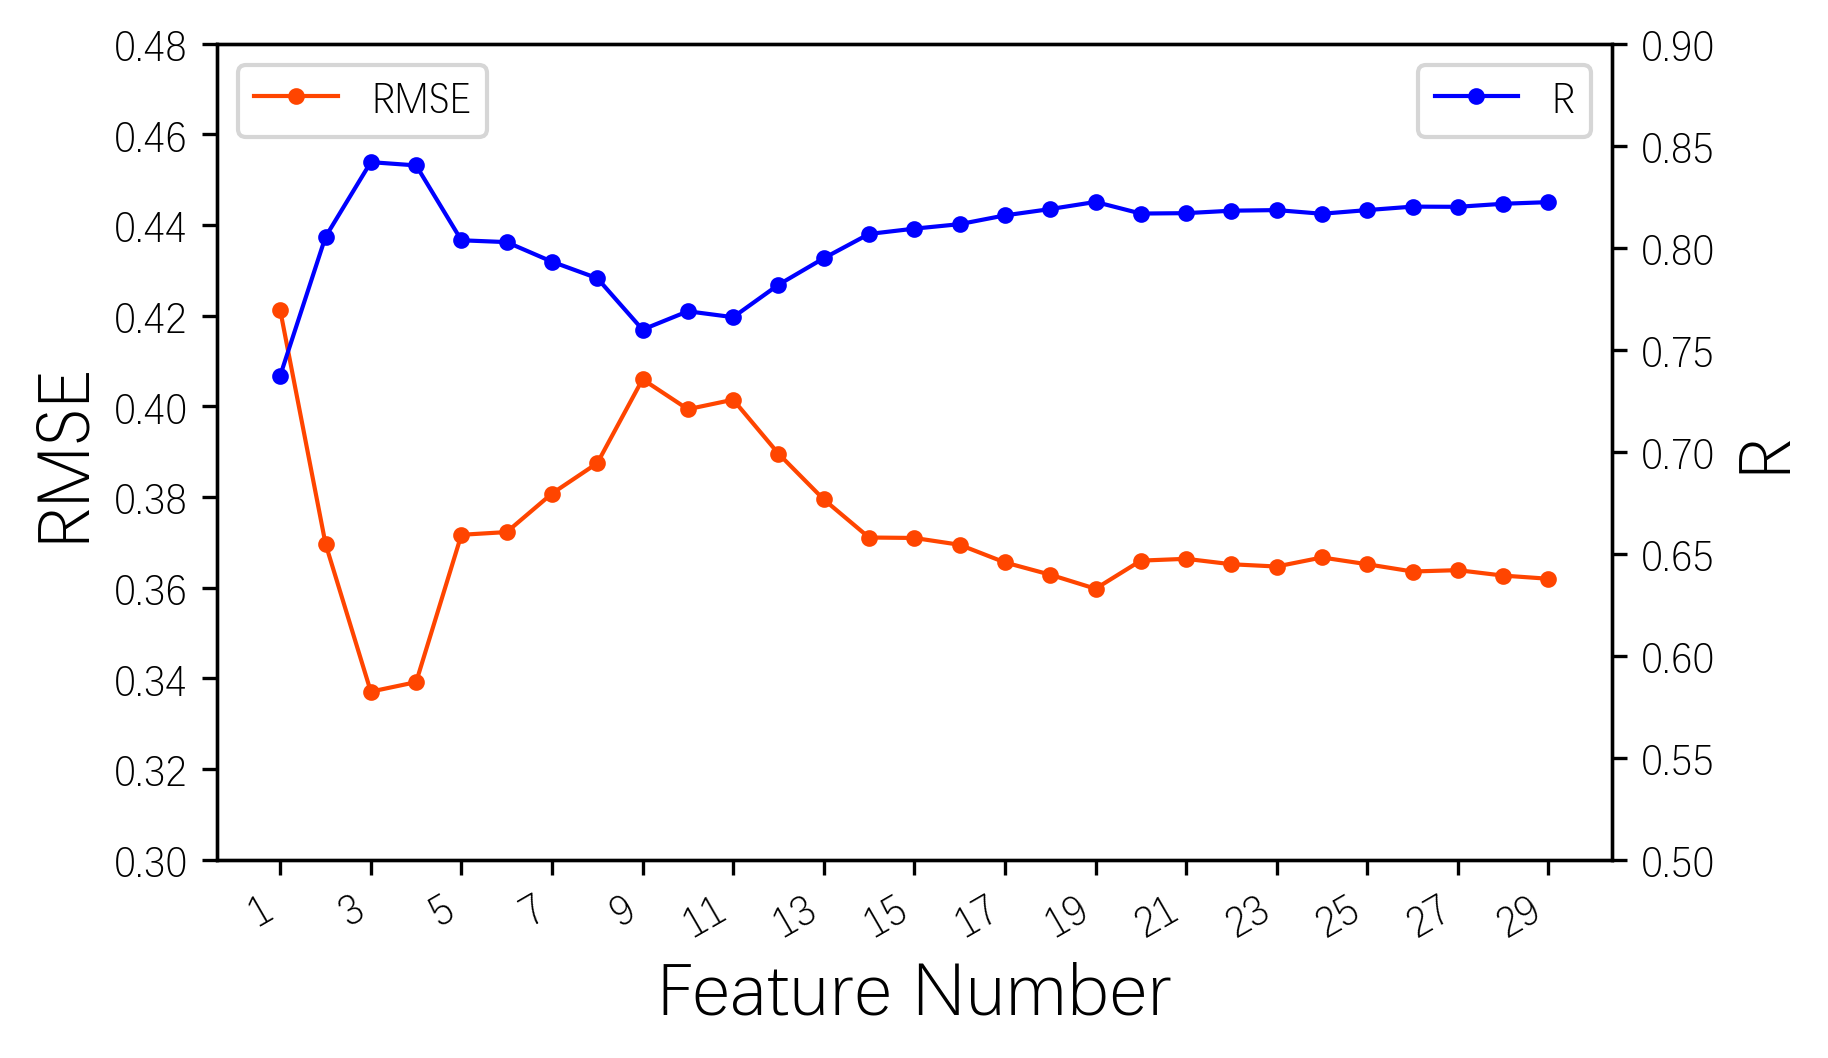

In [34]:
plt.rcParams['savefig.dpi'] = 300  #像素
plt.rcParams['figure.dpi'] = 300    #分辨率

number = [i for i in range(1,n+1)]

fig, ax1 = plt.subplots() # 使用subplots()创建窗口
x_ticks = np.arange(1, 40, 2)
plt.xticks(x_ticks)
ax1.plot(number, RMSE_,'.-', c='orangered',label='RMSE', linewidth = 1) 
#绘制折线图像1,圆形点，标签，线宽
plt.legend(loc=2)
ax2 = ax1.twinx() 
# 创建第二个坐标轴
ax2.plot(number, R_, '.-', c='blue',label='R', linewidth = 1) #同上
plt.legend(loc=1)

ax1.set_xlabel('Feature Number', size=18)
ax1.set_ylabel('RMSE', size=18)
ax1.set_yticks(np.arange(0.3,0.5,0.02))
ax2.set_ylabel('R', size=18)
ax2.set_yticks(np.arange(0.5,0.95,0.05))
plt.gcf().autofmt_xdate()
#自动适应刻度线密度，包括x轴，y轴
plt.show()

In [35]:
# 然后进行XGBoost算法
from sklearn.metrics import mean_squared_error
n = X_train_fea.values.shape[1]
R_= []
RMSE_ = []

for i in range(1,X_train_fea.shape[1]+1):
    x_fea_train = X_train_fea.iloc[:,: i]#训练集依次提取不同数量的特征
    x_fea_test = X_test_fea.iloc[:,: i]
    re = XGBRegressor()
    re.fit(x_fea_train, Y_train_bdg)
    Y_pred_k = cross_val_predict(re,x_fea_train,Y_train_bdg,cv=114)       
    R_train = round(np.corrcoef(Y_train_bdg, Y_pred_k)[0][1],4)
    RMSE_train = round(np.sqrt(mean_squared_error(Y_train_bdg, Y_pred_k)),4)
    R_.append(R_train)
    RMSE_.append(RMSE_train)
print('R:',R_)
print('RMSE:',RMSE_)

[18:57:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:57:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:57:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:57:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:57:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:57:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:57:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:57:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:57:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[18:57:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:57:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:57:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:57:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:57:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:57:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:57:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:57:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:57:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[18:57:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:57:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:57:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:57:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:57:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:57:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:57:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:57:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:57:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[18:58:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[18:58:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[18:58:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[18:58:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[18:58:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[18:58:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[18:58:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[18:58:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[18:58:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[18:58:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[18:58:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[18:58:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[18:58:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[18:58:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[18:58:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[18:58:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[18:58:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[18:58:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[18:58:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[18:58:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[18:58:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[18:58:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[18:58:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[18:58:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[18:58:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[18:58:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[18:58:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[18:58:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[18:58:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[18:58:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:58:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[18:59:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[18:59:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[18:59:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[18:59:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[18:59:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[18:59:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[18:59:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[18:59:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[18:59:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[18:59:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

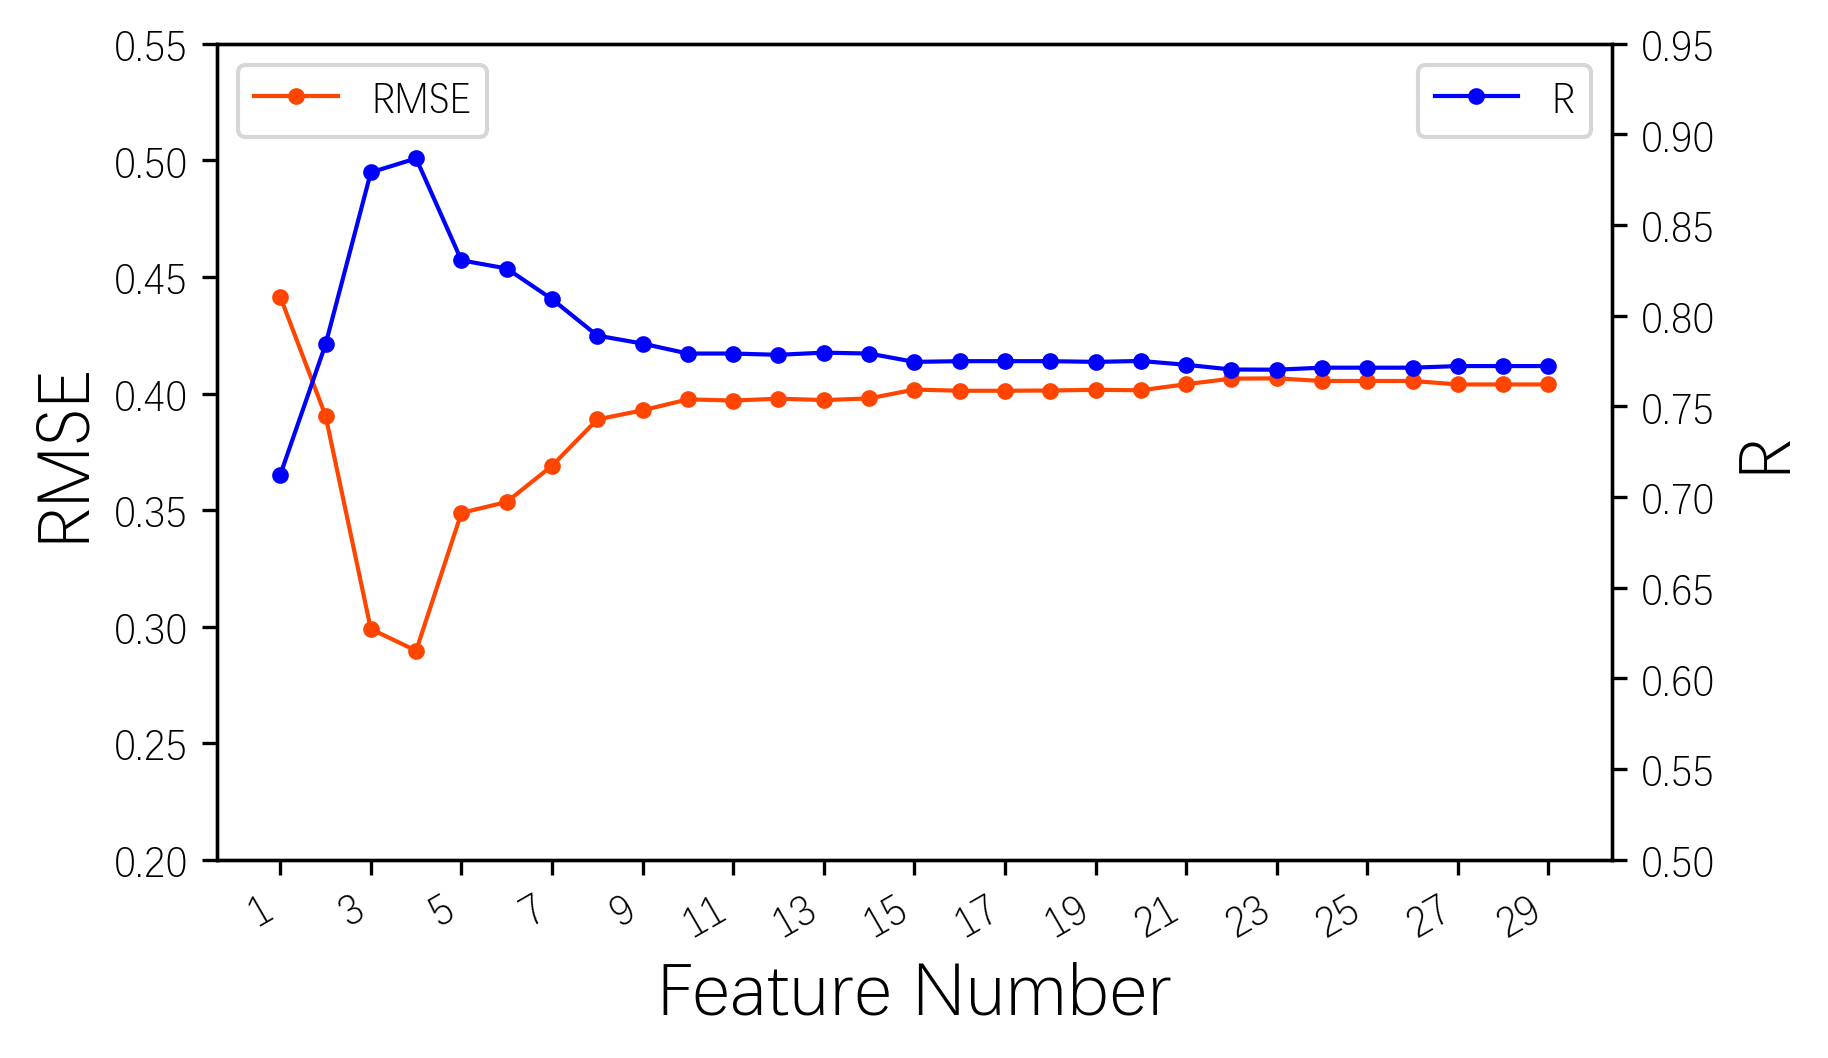

In [36]:
plt.rcParams['savefig.dpi'] = 300  #像素
plt.rcParams['figure.dpi'] = 300    #分辨率

number = [i for i in range(1,n+1)]

fig, ax1 = plt.subplots() # 使用subplots()创建窗口
x_ticks = np.arange(1, 40, 2)
plt.xticks(x_ticks)
ax1.plot(number, RMSE_,'.-', c='orangered',label='RMSE', linewidth = 1) 
#绘制折线图像1,圆形点，标签，线宽
plt.legend(loc=2)
ax2 = ax1.twinx() 
# 创建第二个坐标轴
ax2.plot(number, R_, '.-', c='blue',label='R', linewidth = 1) #同上
plt.legend(loc=1)

ax1.set_xlabel('Feature Number', size=18)
ax1.set_ylabel('RMSE', size=18)
ax1.set_yticks(np.arange(0.2,0.6,0.05))
ax2.set_ylabel('R', size=18)
ax2.set_yticks(np.arange(0.5,1,0.05))
plt.gcf().autofmt_xdate()
#自动适应刻度线密度，包括x轴，y轴
plt.show()

# 模型建立

In [37]:
X_train_xgb = X_train_fea.iloc[:,:15]
X_test_xgb = X_test_fea.iloc[:,:15]
X_train_svr = X_train_fea.iloc[:,:15]
X_test_svr = X_test_fea.iloc[:,:15]

In [69]:
X_train_xgb

,X_E(p),n,B_EV,A_BT,A'_VIP,X_IR,B_EI1,A'_ρ,A'_EI,B_EI2,A_VIP,B_E(a&R),A_DM,orientation,A'_V
new ID,,,,,,,,,,,,,,,
59,-0.635952,1.135267,-0.462868,-0.990631,-0.374329,0.149622,-0.265949,0.027610,-0.839464,-0.226854,-0.809429,-0.470773,0.987440,-0.284594,1.130324
82,1.113850,-0.716556,-1.873291,1.020626,1.758697,-1.528277,4.581444,-0.261008,-0.769900,1.553518,0.759618,-1.274335,-0.892085,-0.284594,0.476161
34,1.697117,-0.716556,1.873938,1.020626,-0.414005,0.451644,0.686331,-0.914284,-0.357626,4.769991,0.759618,1.314919,-0.892085,-0.284594,-2.067723
74,1.113850,-0.716556,-0.462868,1.020626,-0.620762,-1.528277,-0.265949,0.494394,0.739327,-0.226854,0.759618,-0.470773,-0.892085,-0.284594,0.358885
24,-0.635952,2.369816,-0.462868,-0.990631,-0.385595,0.149622,-0.265949,-0.908179,-0.582533,-0.226854,-0.809429,-0.470773,0.987440,-0.284594,-1.449347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,1.113850,-0.716556,-0.462868,1.020626,1.736659,-1.528277,-0.265949,2.287157,-0.609579,-0.226854,0.759618,-0.470773,-0.892085,-0.284594,-1.190492
147,1.113850,0.517993,-0.462868,-0.990631,-0.385595,-1.528277,-0.265949,-0.908179,-0.582533,-0.226854,-0.809429,-0.470773,0.987440,-0.284594,-1.449347
108,1.113850,-0.099282,-0.462868,-0.990631,-0.741613,-1.528277,-0.265949,-0.298750,1.159741,-0.226854,-0.809429,-0.470773,0.987440,-0.284594,0.101974


In [38]:
model1 = XGBRegressor()   #建立模型
model1.fit(X_train_xgb,Y_train_bdg)
    
Y_train_pred = model1.predict(X_train_xgb)
Y_test_pred = model1.predict(X_test_xgb)

    
#对训练集的分析
R_train = round(np.corrcoef(Y_train_bdg, Y_train_pred)[0][1],4)
RMSE_train = round(np.sqrt(mean_squared_error(Y_train_bdg,Y_train_pred)),4)
MAE_train = round(mean_absolute_error(Y_train_bdg,Y_train_pred),4)
r2_train = round(r2_score(Y_train_bdg,Y_train_pred),4)
print('训练集相关系数R:',R_train)
print('训练集均方根误差RMSE:',RMSE_train)
print('平均绝对误差MAE',MAE_train)
print('拟合优度r2',r2_train)
    
#对测试分析
R_test = round(np.corrcoef(Y_test_bdg, Y_test_pred)[0][1],4)
RMSE_test = round(np.sqrt(mean_squared_error(Y_test_bdg, Y_test_pred)),4)
MAE_test = round(mean_absolute_error(Y_test_bdg,Y_test_pred),4)
r2_test = round(r2_score(Y_test_bdg,Y_test_pred),4)
print('测试集相关系数:',R_test)
print('测试集均方根误差:',RMSE_test)
print('平均绝对误差MAE',MAE_test)
print('拟合优度r2:',r2_test)

[19:03:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
训练集相关系数R: 0.9869
训练集均方根误差RMSE: 0.1025
平均绝对误差MAE 0.0731
拟合优度r2 0.973
测试集相关系数: 0.9359
测试集均方根误差: 0.1842
平均绝对误差MAE 0.1539
拟合优度r2: 0.8743


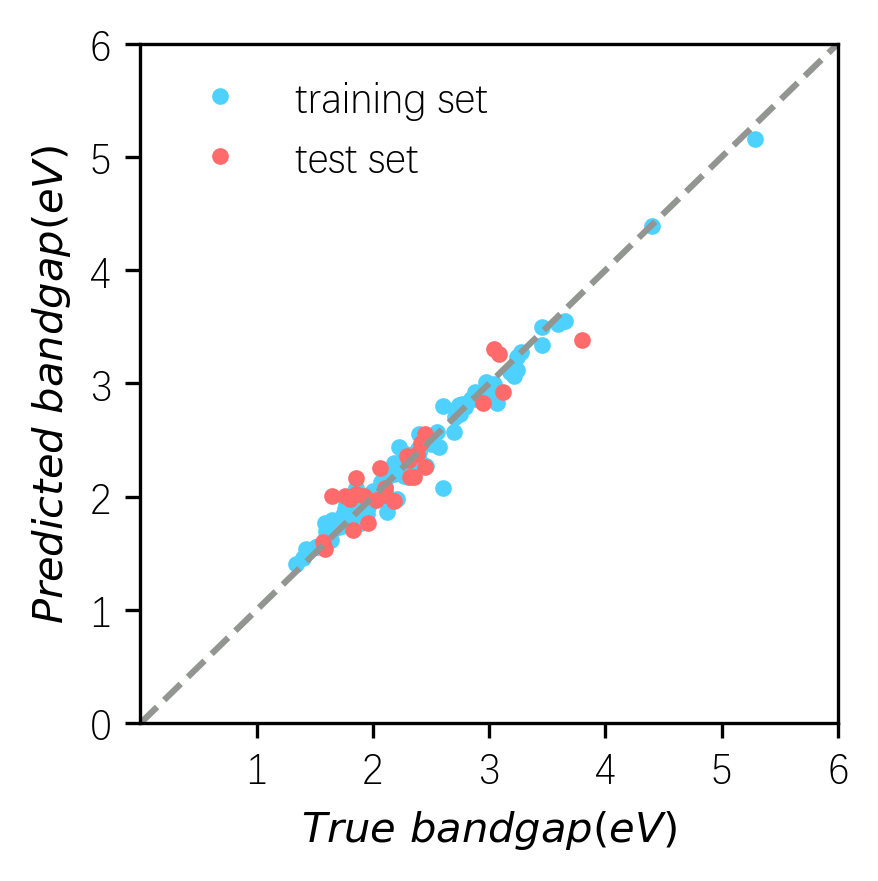

In [39]:
#绘制训练集和测试集的图表，观察其预测情况
plt.figure(figsize=(3,3),dpi=300)
#plt.title(name)
plt.plot(Y_train_bdg,Y_train_pred,".",c = '#4ed1ff',alpha = 1,label="training set")
plt.plot(Y_test_bdg,Y_test_pred,".",c = '#ff6a6a',alpha = 1,label="test set")  
plt.xlabel(r'$True\ bandgap(eV)$')
plt.ylabel(r'$Predicted\ bandgap(eV)$')
plt.plot([0,6],[0,6],'--',c = '#929591')
plt.xlim(0,6)
plt.xticks(range(1,7,1))  #设置一下横轴   fontsize=20
plt.ylim(0,6)
plt.legend(frameon=False)   #去掉图注的边框
plt.show()

训练集相关系数R: 0.9566
训练集均方根误差RMSE: 0.1945
平均绝对误差MAE 0.1161
拟合优度r2 0.9026
测试集相关系数: 0.9396
测试集均方根误差: 0.1789
平均绝对误差MAE 0.1459
拟合优度r2: 0.8814


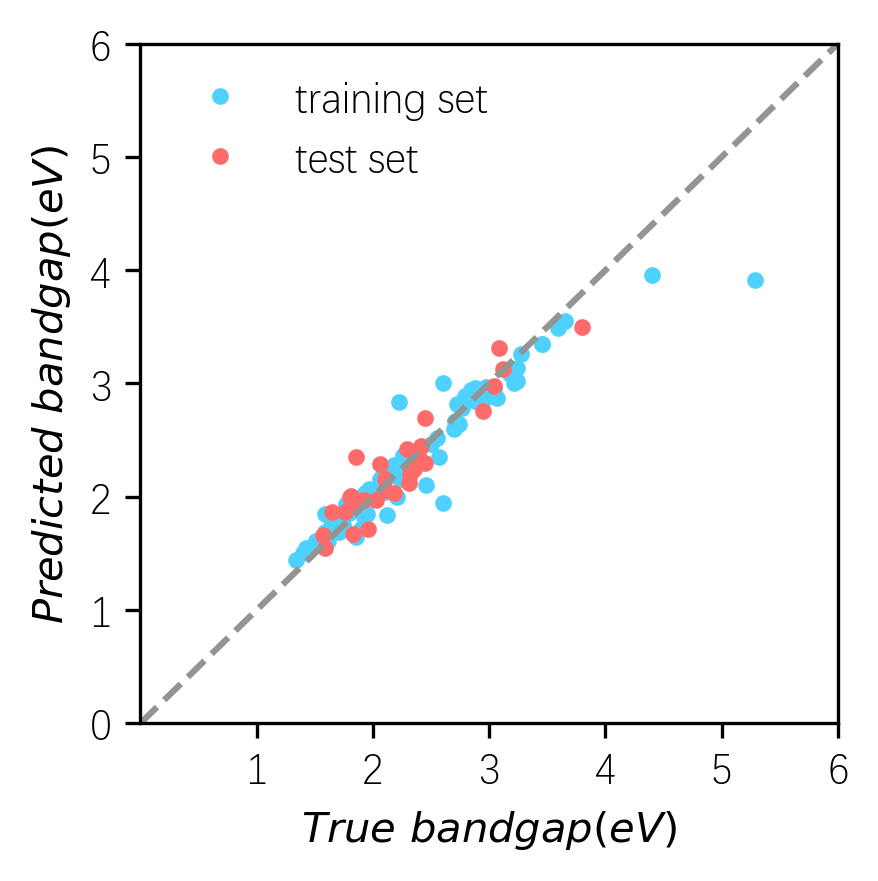

In [40]:
model2 = SVR()   #建立模型
model2.fit(X_train_svr,Y_train_bdg)
    
Y_train_pred = model2.predict(X_train_svr)
Y_test_pred = model2.predict(X_test_svr)
    
#对训练集的分析
R_train = round(np.corrcoef(Y_train_bdg, Y_train_pred)[0][1],4)
RMSE_train = round(np.sqrt(mean_squared_error(Y_train_bdg,Y_train_pred)),4)
MAE_train = round(mean_absolute_error(Y_train_bdg,Y_train_pred),4)
r2_train = round(r2_score(Y_train_bdg,Y_train_pred),4)
print('训练集相关系数R:',R_train)
print('训练集均方根误差RMSE:',RMSE_train)
print('平均绝对误差MAE',MAE_train)
print('拟合优度r2',r2_train)
    
#对测试分析
R_test = round(np.corrcoef(Y_test_bdg, Y_test_pred)[0][1],4)
RMSE_test = round(np.sqrt(mean_squared_error(Y_test_bdg, Y_test_pred)),4)
MAE_test = round(mean_absolute_error(Y_test_bdg,Y_test_pred),4)
r2_test = round(r2_score(Y_test_bdg,Y_test_pred),4)
print('测试集相关系数:',R_test)
print('测试集均方根误差:',RMSE_test)
print('平均绝对误差MAE',MAE_test)
print('拟合优度r2:',r2_test)
    
    
#绘制训练集和测试集的图表，观察其预测情况
plt.figure(figsize=(3,3),dpi=300)
#plt.title(name)
plt.plot(Y_train_bdg,Y_train_pred,".",c = '#4ed1ff',alpha = 1,label="training set")
plt.plot(Y_test_bdg,Y_test_pred,".",c = '#ff6a6a',alpha = 1,label="test set")  
plt.xlabel(r'$True\ bandgap(eV)$')
plt.ylabel(r'$Predicted\ bandgap(eV)$')
plt.plot([0,6],[0,6],'--',c = '#929591')
plt.xlim(0,6)
plt.xticks(range(1,7,1))  #设置一下横轴   fontsize=20
plt.ylim(0,6)
plt.legend(frameon=False)   #去掉图注的边框
plt.show()

# 交叉验证

In [43]:
#XGBoost交叉验证

print("XGBoost")
#model21 = SVR()   #建立模型
#model21.fit(X_train,Y_train)
Y_pred_k = cross_val_predict(model1,X_train_svr,Y_train_bdg,cv=10)

R_train = round(np.corrcoef(Y_train_bdg, Y_pred_k)[0][1],4)
RMSE_train = round(np.sqrt(mean_squared_error(Y_train_bdg, Y_pred_k)),4)
MAE_train = round(mean_absolute_error(Y_train_bdg,Y_pred_k),4)
r2_train = round(r2_score(Y_train_bdg,Y_pred_k),4)
print('相关系数R:',R_train)
print('均方根误差RMSE:',RMSE_train)
print('平均绝对误差MAE',MAE_train)
print('拟合优度r2:',r2_train)

#五折交叉验证的结果
# 相关系数R: 0.796
# 均方根误差RMSE: 0.382
# 平均绝对误差MAE 0.2216
# 拟合优度r2: 0.6257
    
#十折交叉验证的结果
# 相关系数R: 0.7965
# 均方根误差RMSE: 0.3801
# 平均绝对误差MAE 0.2175
# 拟合优度r2: 0.6295

#留一法交叉验证的结果
# 相关系数R: 0.7973
# 均方根误差RMSE: 0.3799
# 平均绝对误差MAE 0.2184
# 拟合优度r2: 0.6299

XGBoost
[19:07:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:07:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:07:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:07:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:07:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:07:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:07:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:07:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:07:27] WARNING: src/objective/regression_obj.cu:152: reg:lin

In [46]:
#SVR十折交叉验证

print("SVR")
#model21 = SVR()   #建立模型
#model21.fit(X_train,Y_train)
Y_pred_k = cross_val_predict(model2,X_train_svr,Y_train_bdg,cv=10)

R_train = round(np.corrcoef(Y_train_bdg, Y_pred_k)[0][1],4)
RMSE_train = round(np.sqrt(mean_squared_error(Y_train_bdg, Y_pred_k)),4)
MAE_train = round(mean_absolute_error(Y_train_bdg,Y_pred_k),4)
r2_train = round(r2_score(Y_train_bdg,Y_pred_k),4)
print('相关系数R:',R_train)
print('均方根误差RMSE:',RMSE_train)
print('平均绝对误差MAE',MAE_train)
print('拟合优度r2:',r2_train)

#五折交叉验证的结果
# 相关系数R: 0.796
# 均方根误差RMSE: 0.382
# 平均绝对误差MAE 0.2216
# 拟合优度r2: 0.6257
    
#十折交叉验证的结果
# 相关系数R: 0.8033
# 均方根误差RMSE: 0.3752
# 平均绝对误差MAE 0.2159
# 拟合优度r2: 0.6378

#留一法交叉验证的结果
# 相关系数R: 0.8094
# 均方根误差RMSE: 0.371
# 平均绝对误差MAE 0.212
# 拟合优度r2: 0.6259


SVR
相关系数R: 0.8033
均方根误差RMSE: 0.3752
平均绝对误差MAE 0.2159
拟合优度r2: 0.6378


# SHAP 分析

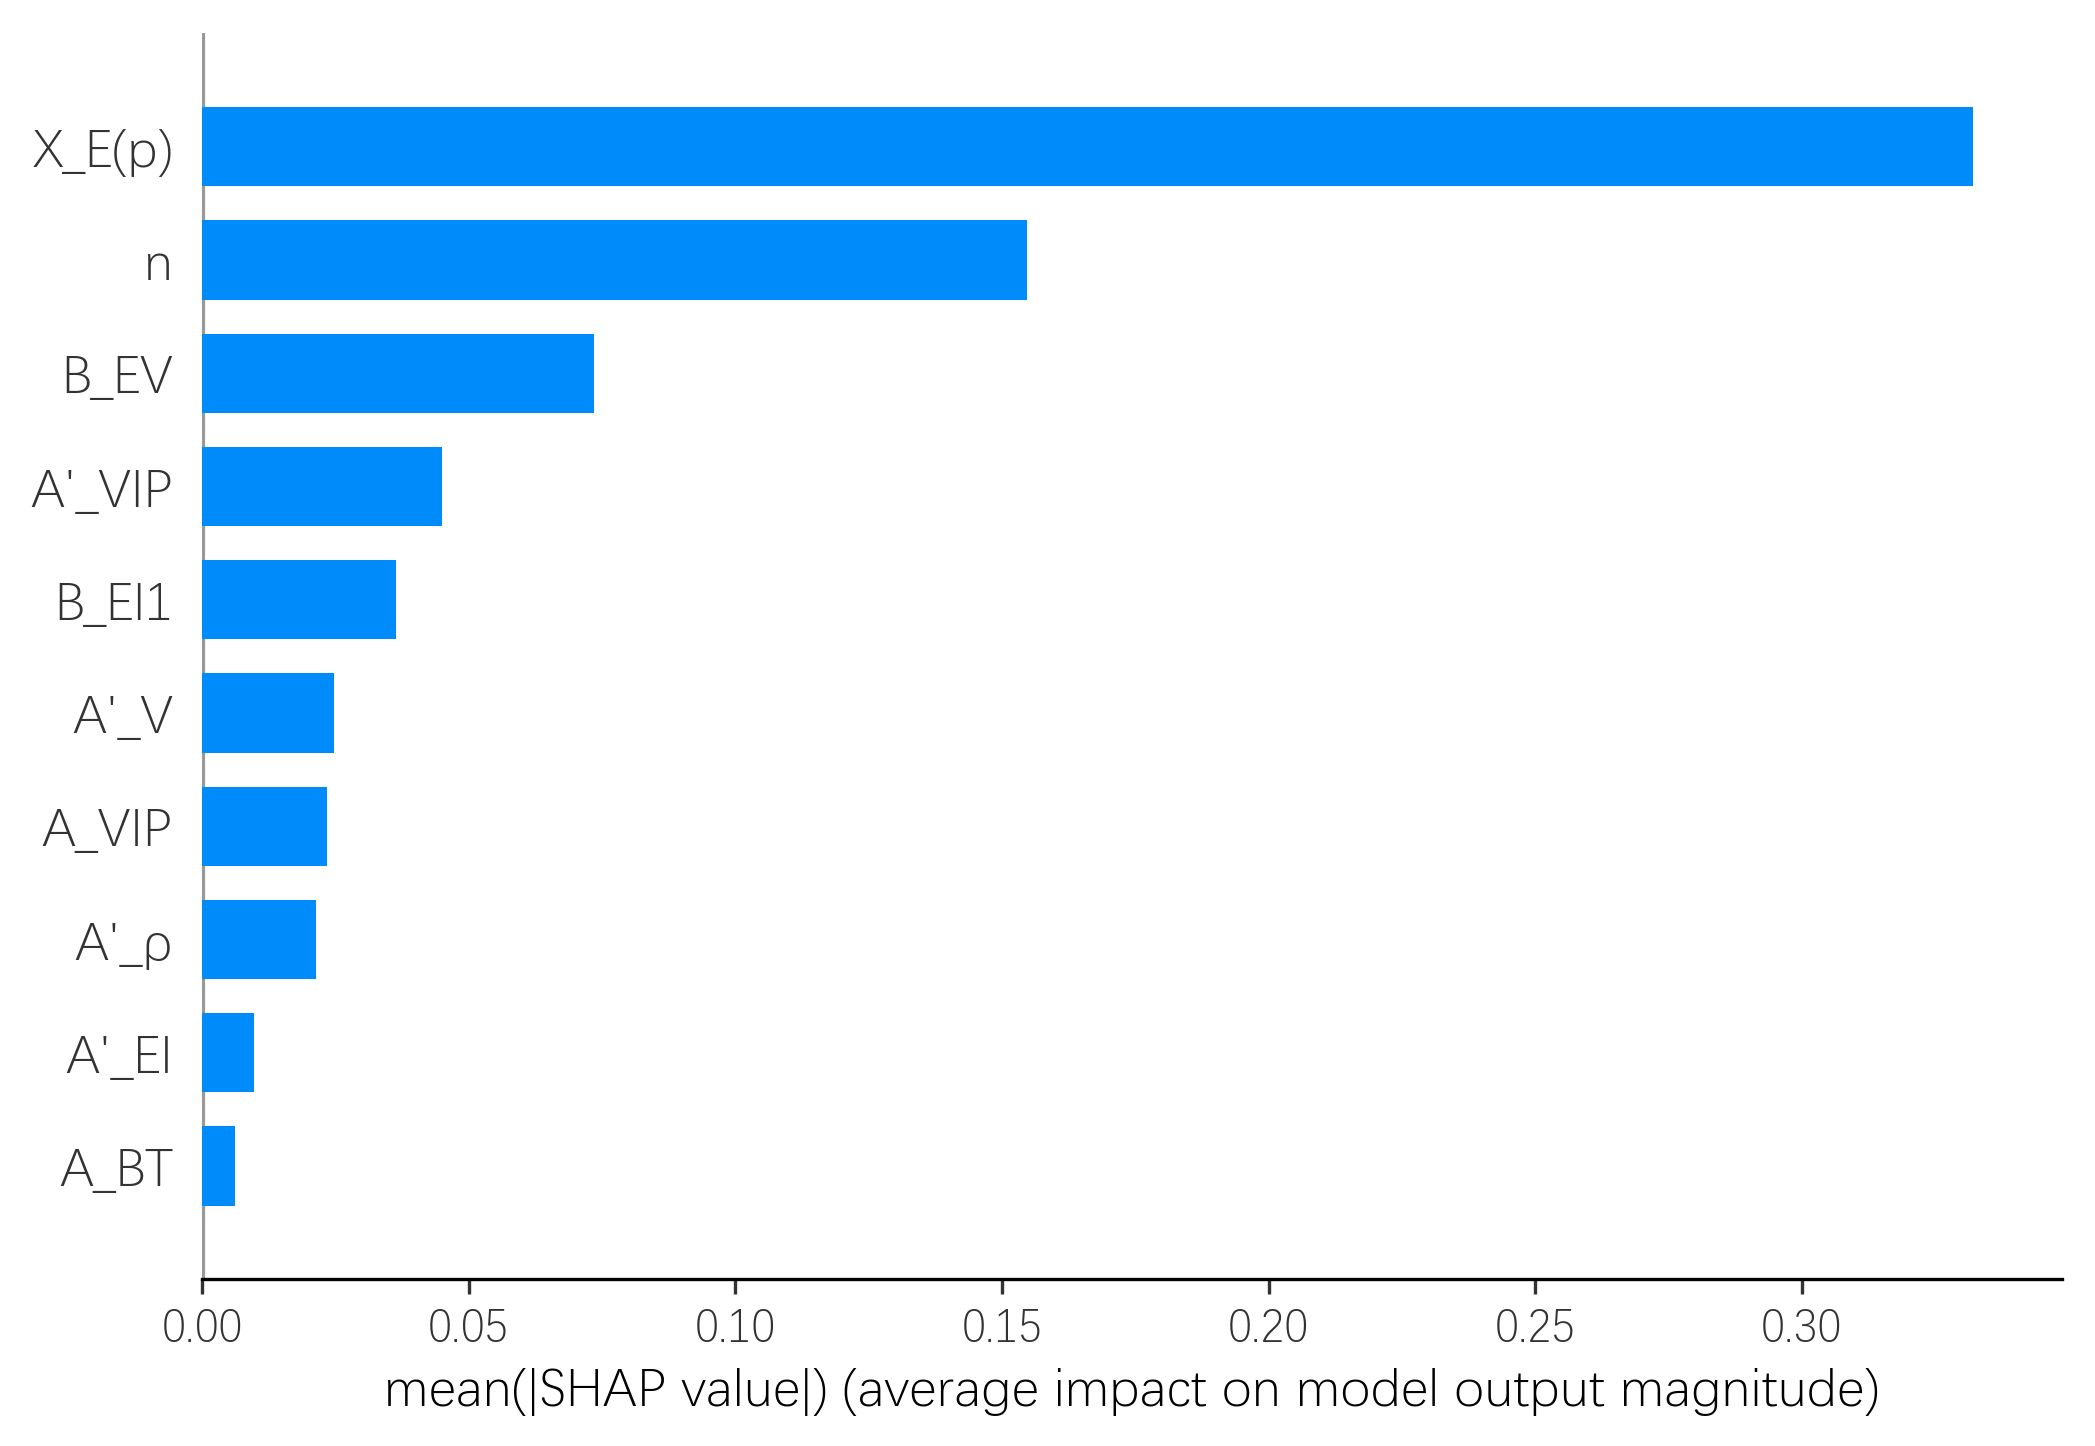

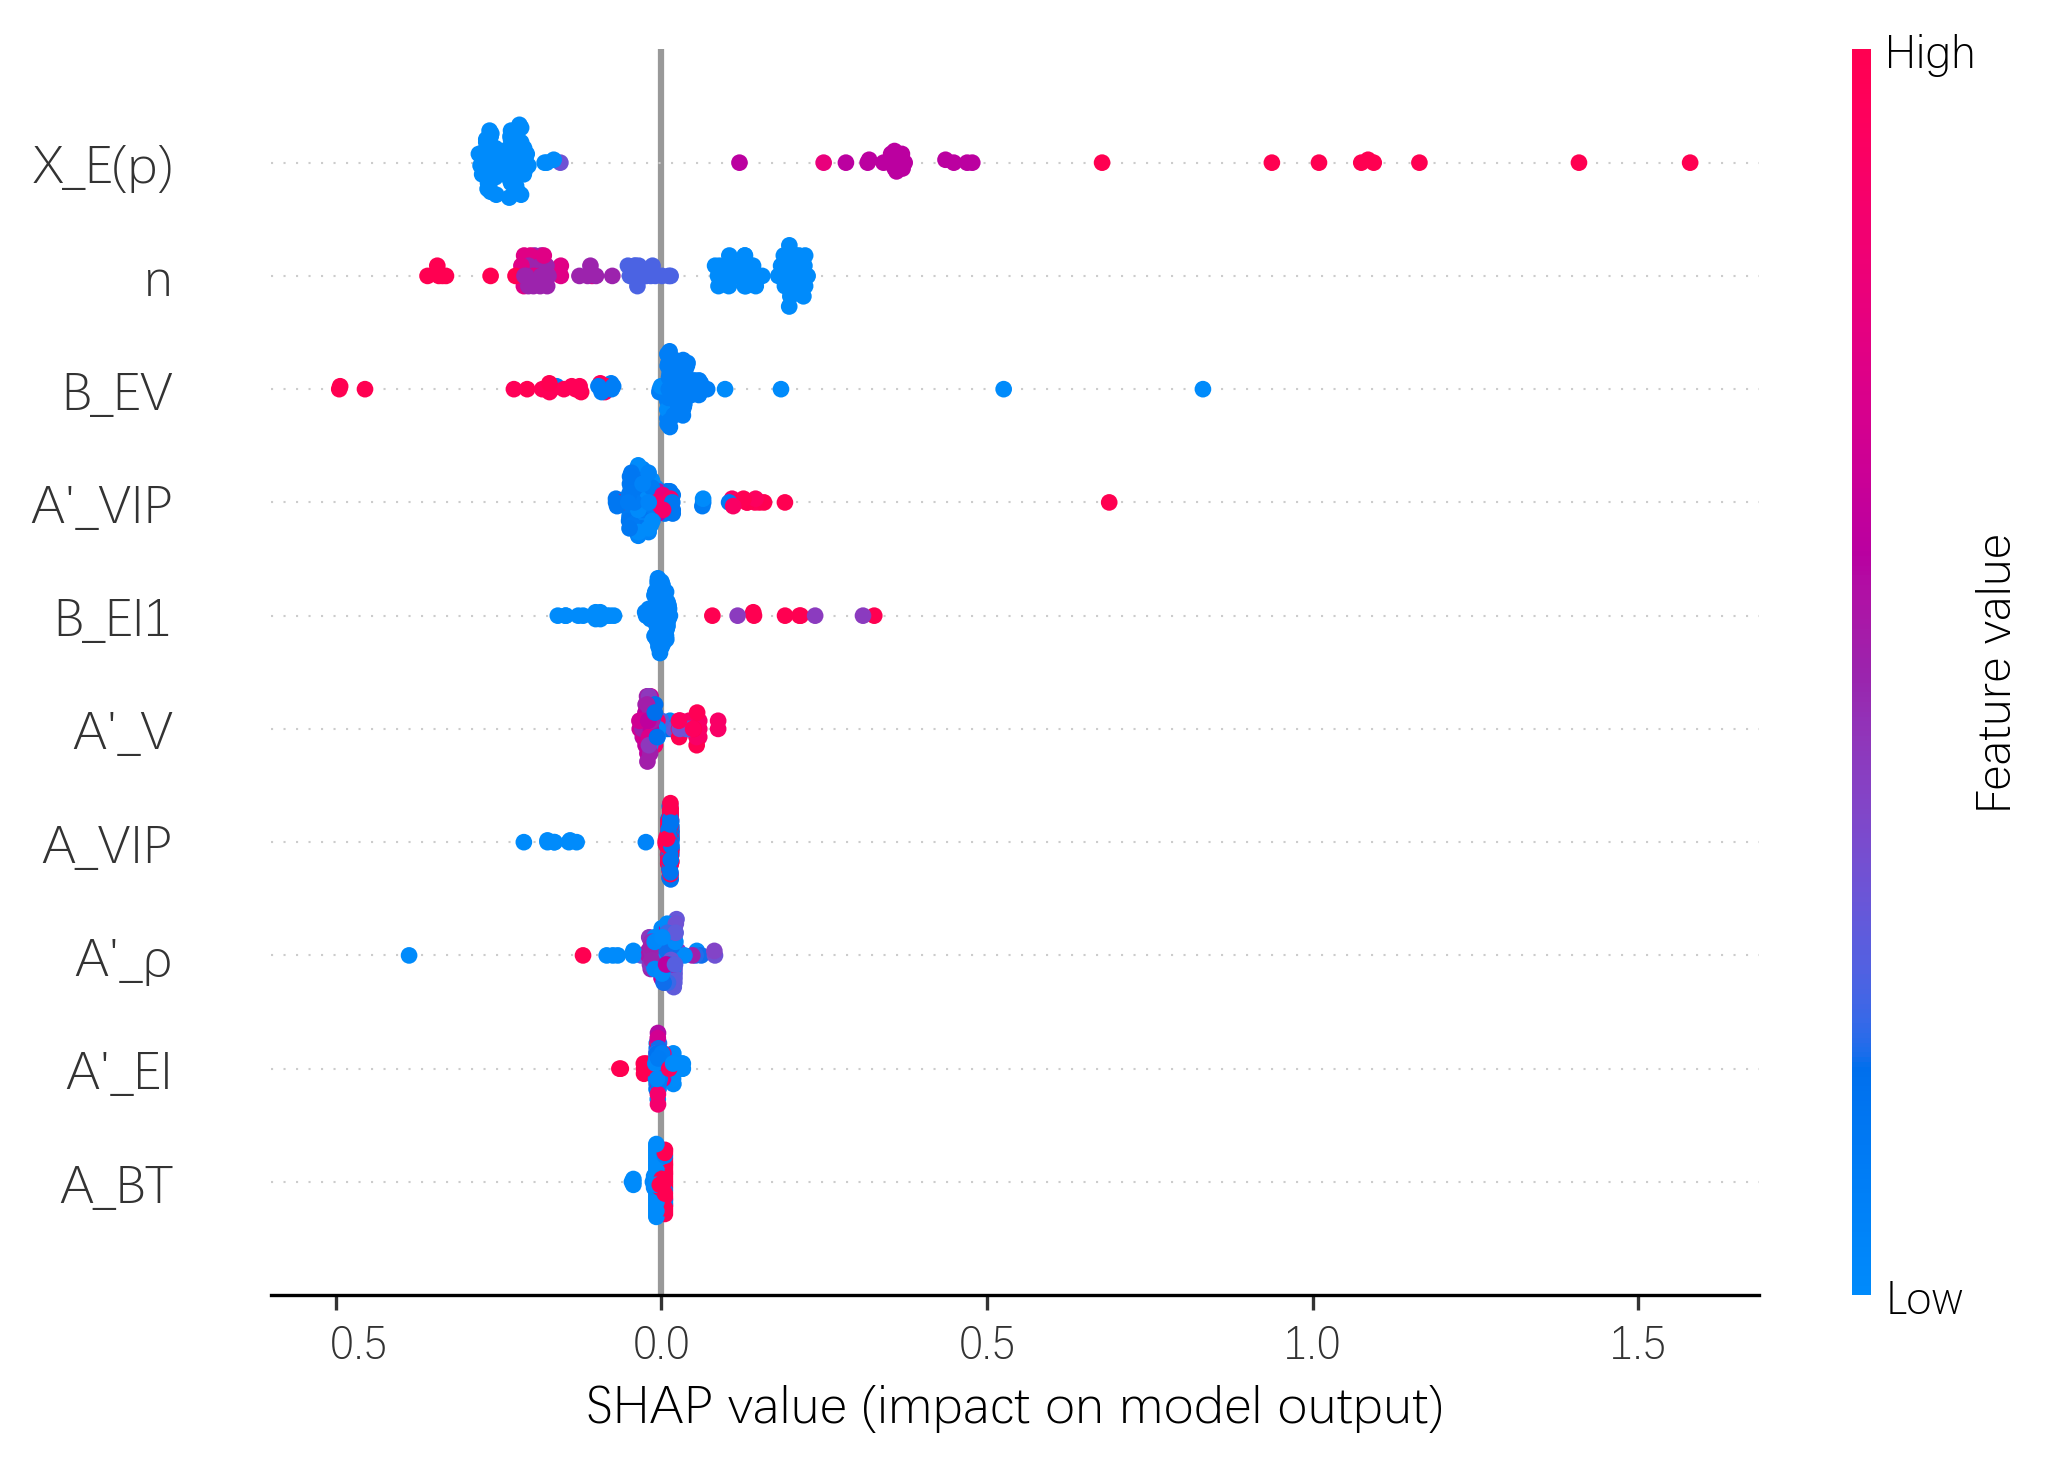

In [55]:
#进行XGBoost的shap分析

#matplotlib.rcParams['axes.unicode_minus']=False

import shap
explainer = shap.TreeExplainer(model1) 

#model = model1.fit(X_train,Y_train,verbose=100)
preds = model1.predict(X_train_xgb)
explainer = shap.TreeExplainer(model1)

shap_values = explainer.shap_values(X_train_xgb)

import matplotlib.pyplot as plt
shap.summary_plot(shap_values, X_train_xgb, max_display=10,plot_type="bar")
shap.summary_plot(shap_values,X_train_xgb,max_display=10)
#一个是总共的，一个是能展现每个变量的数值分布、变量每个数值的shap值、变量的重要性排序，为每个变量的信息提供参考

plt.show()

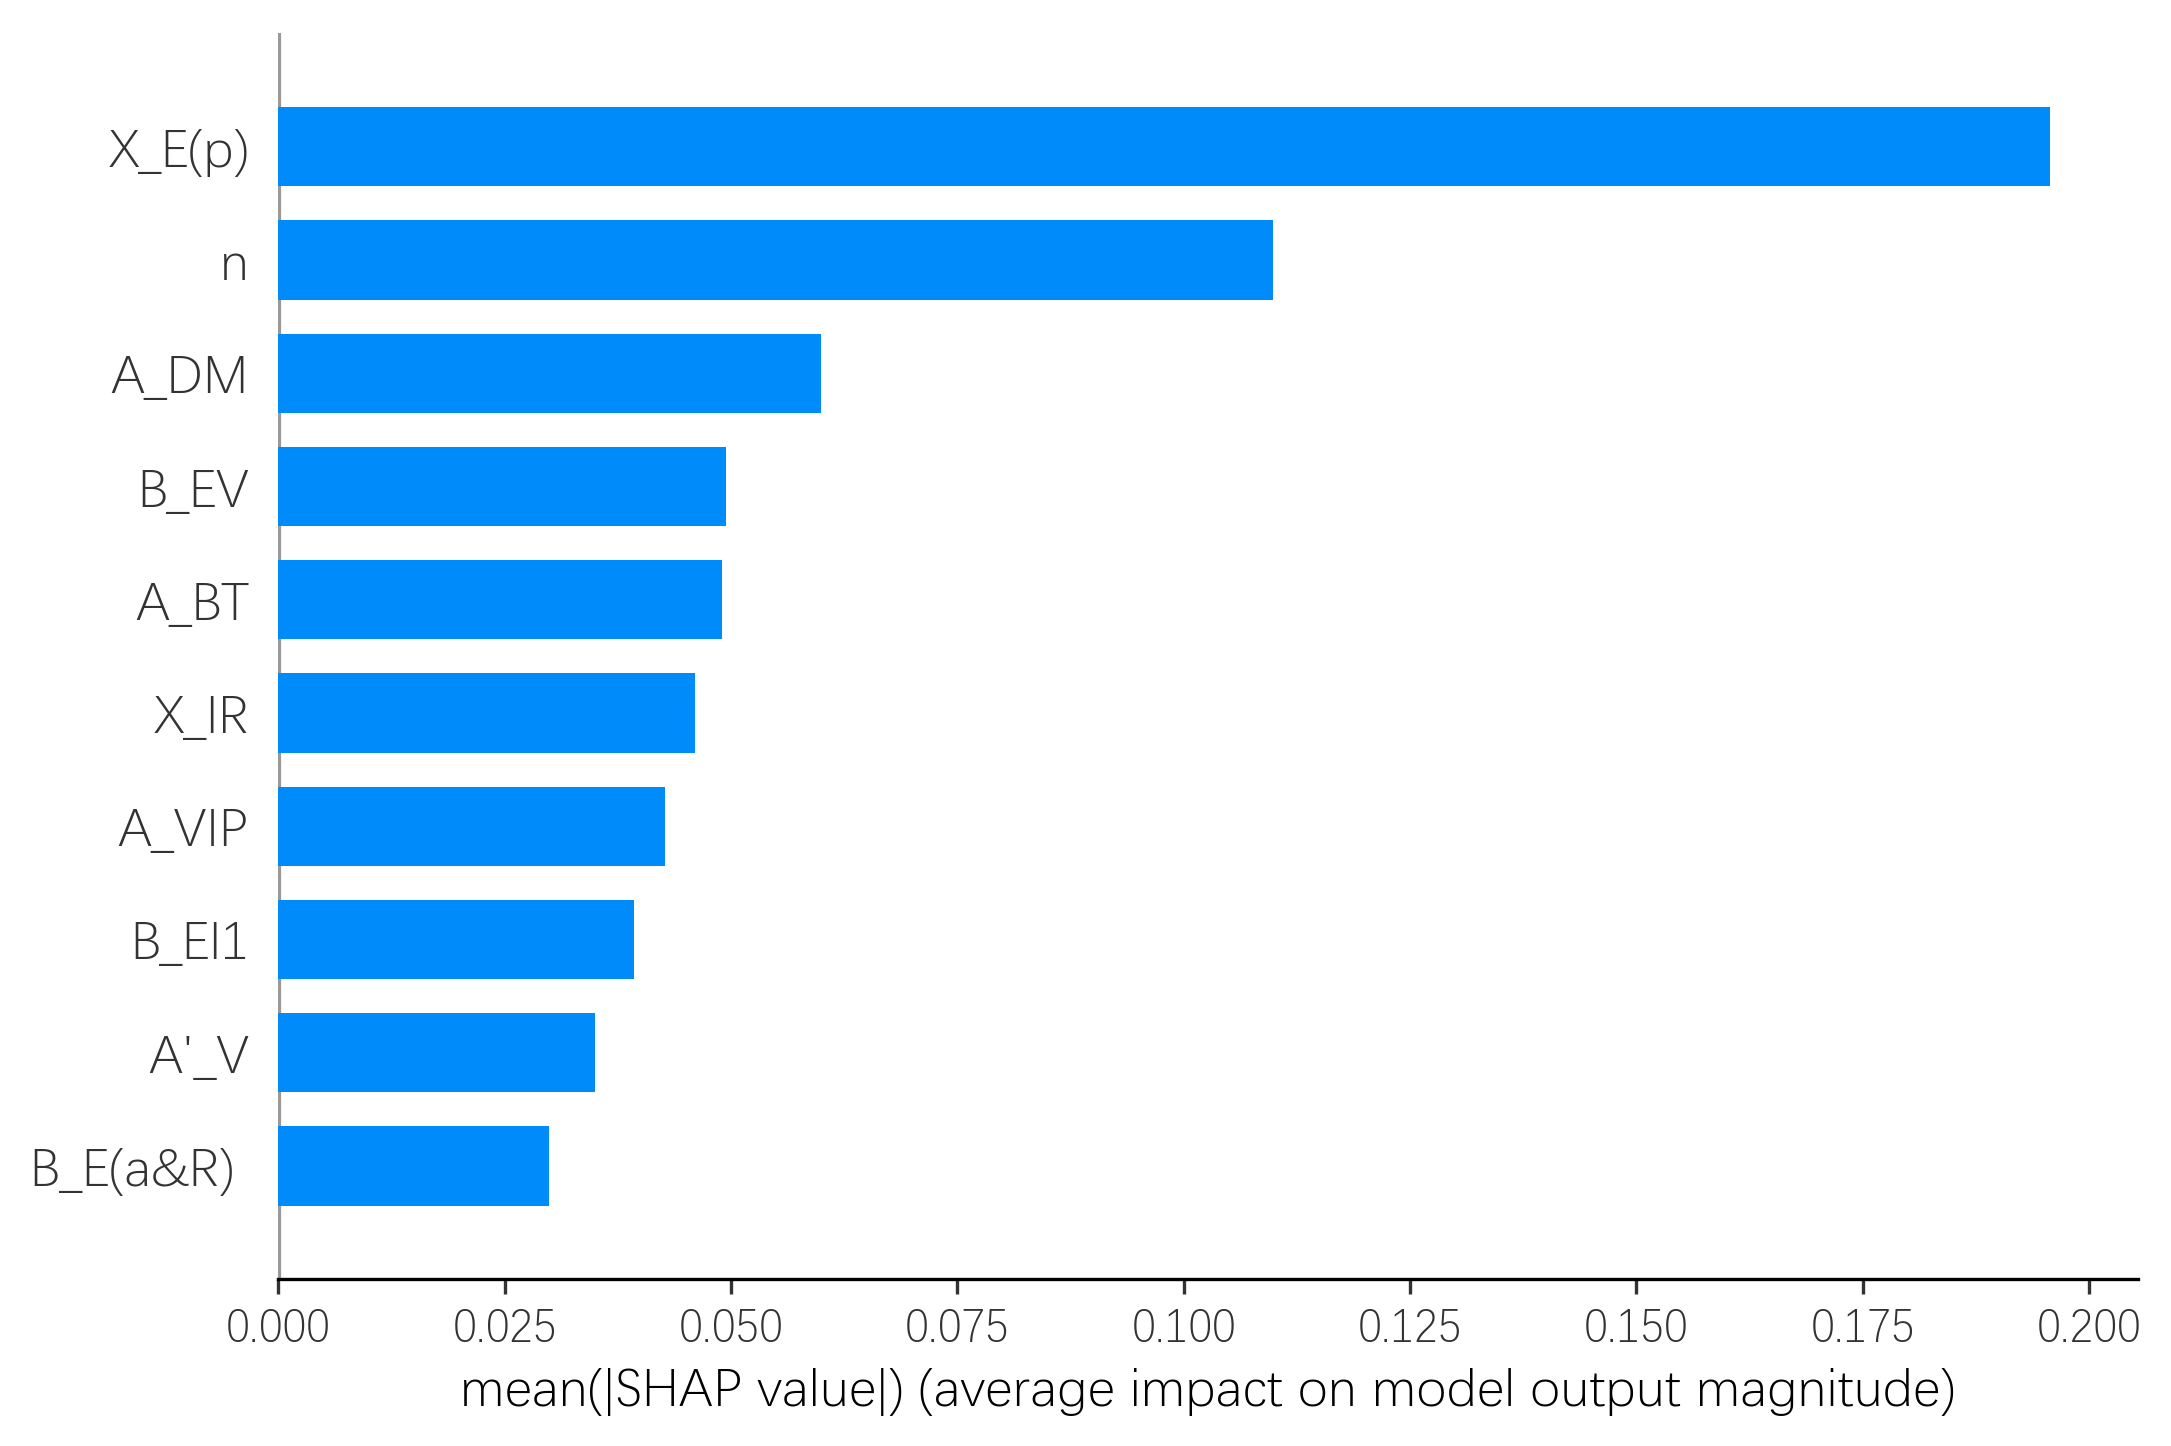

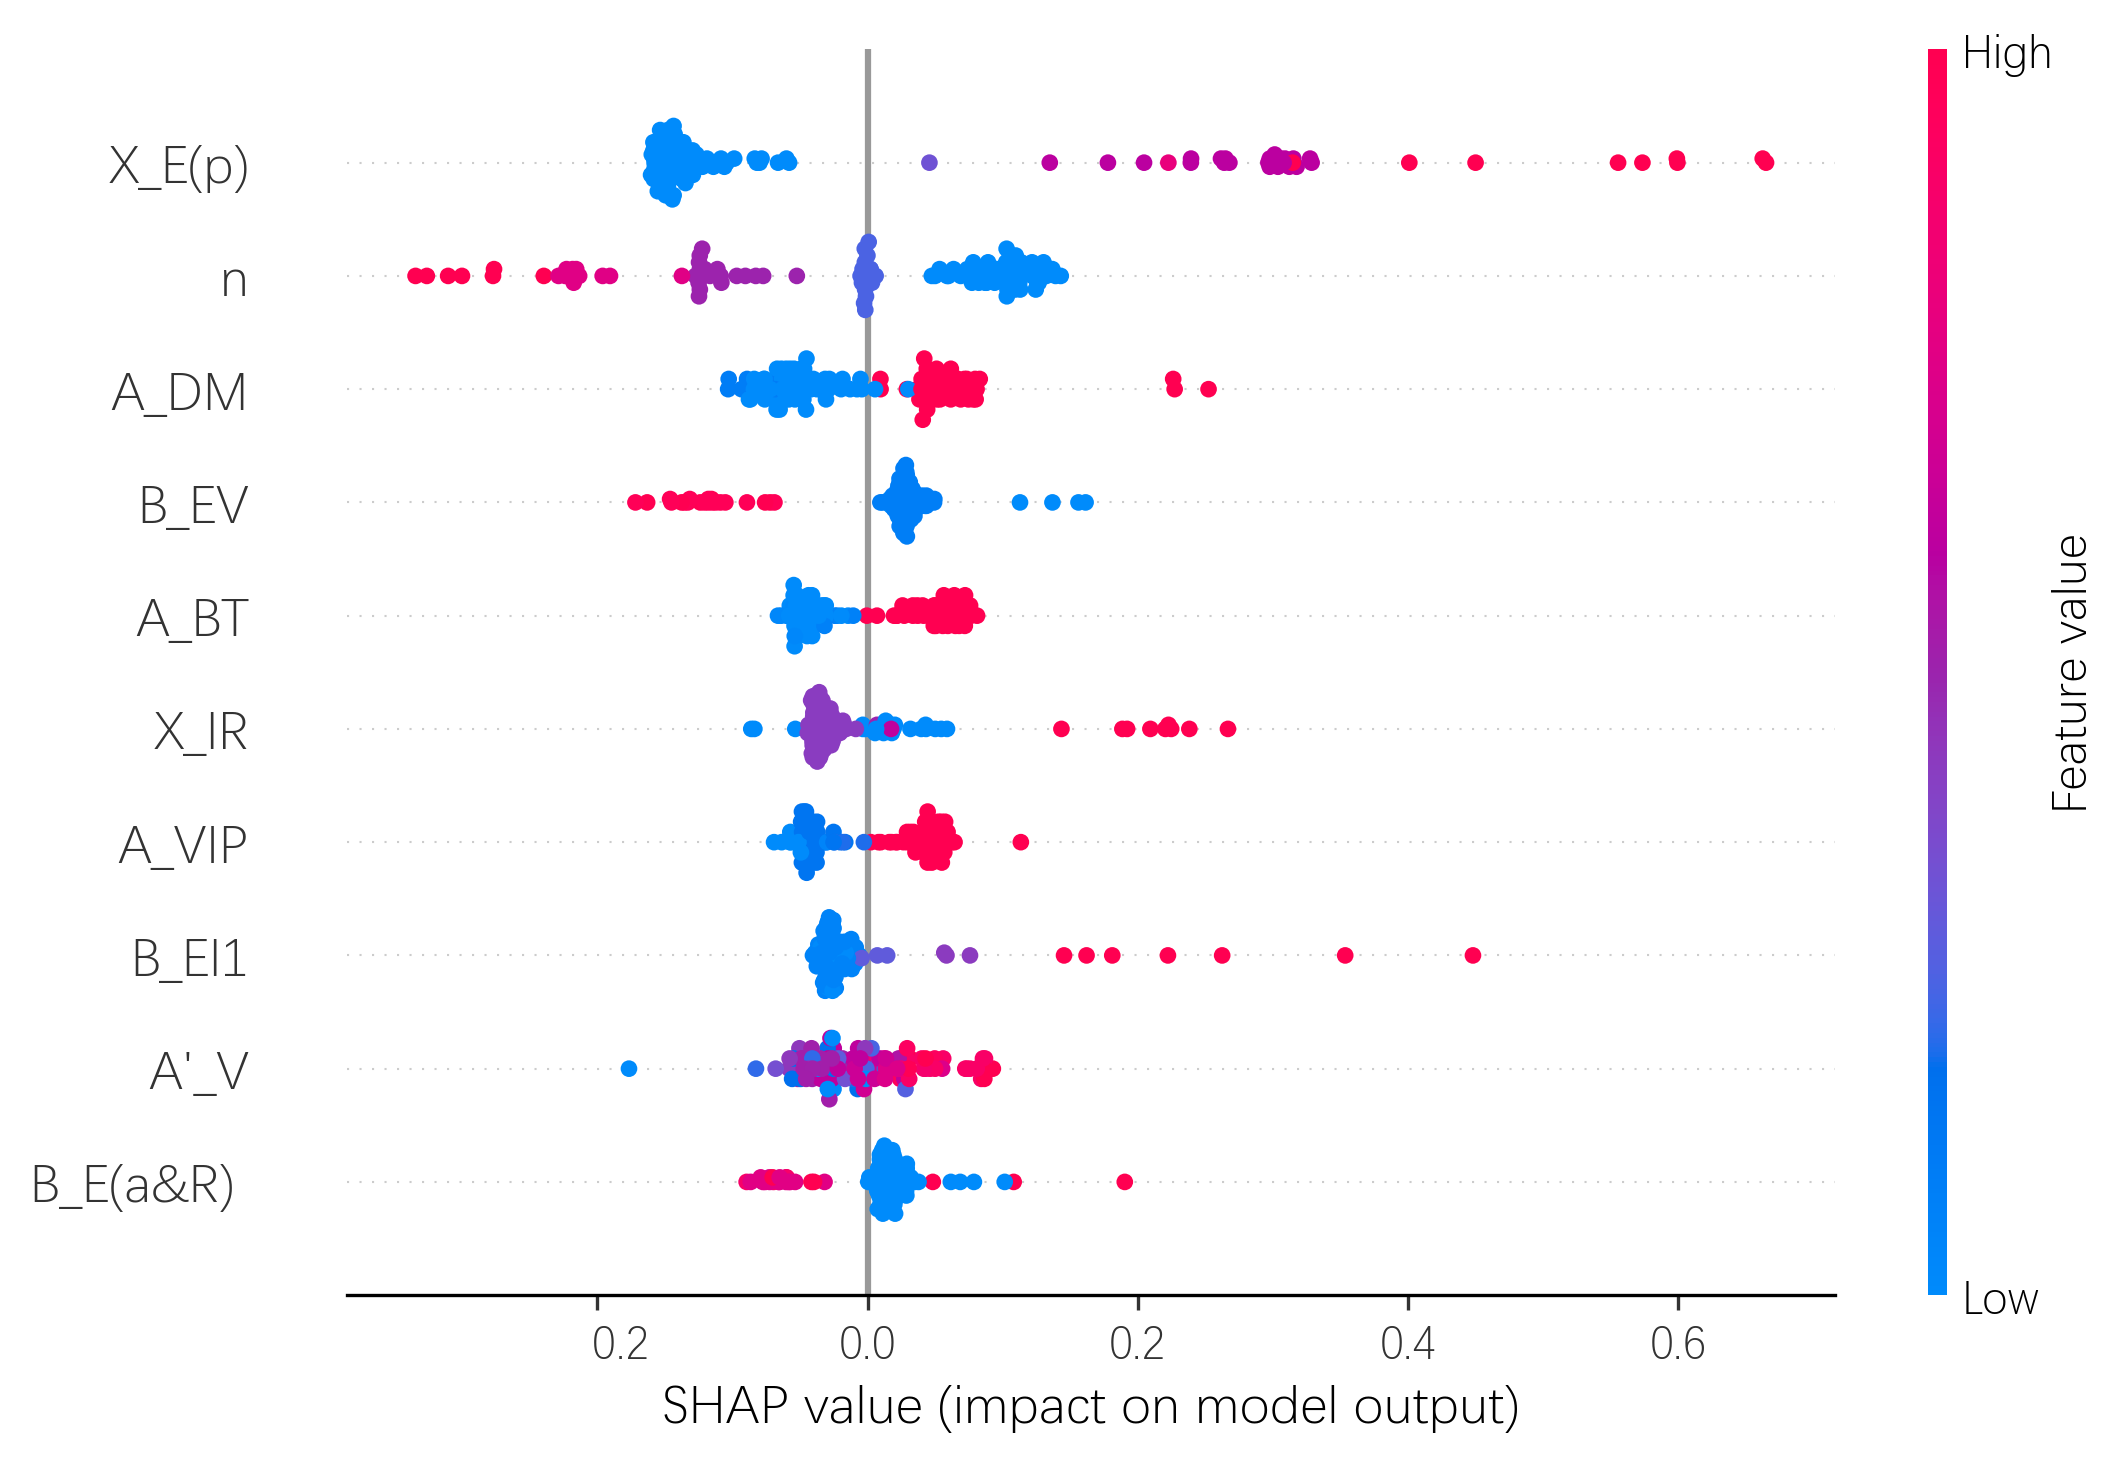

In [56]:
#进行svr的shap分析

#model = model1.fit(X_train,Y_train,verbose=100)
#preds = model2.predict(X_train_svr)
explainer = shap.explainers.Permutation(model2.predict,X_train_svr)

shap_values = explainer(X_train_svr)

import matplotlib.pyplot as plt
shap.summary_plot(shap_values, X_train_svr, max_display=10,plot_type="bar")
shap.summary_plot(shap_values,X_train_svr,max_display=10)
#一个是总共的，一个是能展现每个变量的数值分布、变量每个数值的shap值、变量的重要性排序，为每个变量的信息提供参考

plt.show()

# 高通量筛选

In [70]:
HTS_data = pd.read_csv("0311处理结果\\HTS_DATA.csv")
HTS_data.head()

,A1,A,B,X,n1,ori,X_E(p),n,B_EV,A_BT,...,A'_MPI,A'_So,B_IR,A_EN,A'_AW,B_RC,B_CPM,A'_DM,B_E,B_R
0,EA,FA,Al,I,1,100,2.5,1,290.8,-47.423915,...,5.410101,0.0756,0.76,1.327623,46.0917,125,4.2,1.491452,3.23,0.5
1,EA,FA,Al,I,1,110,2.5,1,290.8,-47.423915,...,5.410101,0.0756,0.76,1.327623,46.0917,125,4.2,1.491452,3.23,0.5
2,EA,FA,Al,I,1,111,2.5,1,290.8,-47.423915,...,5.410101,0.0756,0.76,1.327623,46.0917,125,4.2,1.491452,3.23,0.5
3,EA,FA,Al,I,2,100,2.5,2,290.8,-47.423915,...,5.410101,0.0756,0.76,1.327623,46.0917,125,4.2,1.491452,3.23,0.5
4,EA,FA,Al,I,2,110,2.5,2,290.8,-47.423915,...,5.410101,0.0756,0.76,1.327623,46.0917,125,4.2,1.491452,3.23,0.5


In [71]:
X_HTS = HTS_data.iloc[:,6:21]
X_HTS.head(5)

,X_E(p),n,B_EV,A_BT,A'_VIP,X_IR,B_EI1,A'_ρ,A'_EI,B_EI2,A_VIP,B_E(a&R),A_DM,orientation,A'_V
0,2.5,1,290.8,-47.423915,-3.792,0.65,577.6,0.9927,4.0936,1817,-4.7143,1.47,0.081986,1,77.09811
1,2.5,1,290.8,-47.423915,-3.792,0.65,577.6,0.9927,4.0936,1817,-4.7143,1.47,0.081986,2,77.09811
2,2.5,1,290.8,-47.423915,-3.792,0.65,577.6,0.9927,4.0936,1817,-4.7143,1.47,0.081986,3,77.09811
3,2.5,2,290.8,-47.423915,-3.792,0.65,577.6,0.9927,4.0936,1817,-4.7143,1.47,0.081986,1,77.09811
4,2.5,2,290.8,-47.423915,-3.792,0.65,577.6,0.9927,4.0936,1817,-4.7143,1.47,0.081986,2,77.09811


In [72]:
X_HTS_std = StandardScaler().fit_transform(X_HTS)
X_HTS_std = pd.DataFrame(X_HTS_std)
X_HTS_std.columns = X_HTS.columns
X_HTS_std.head()

,X_E(p),n,B_EV,A_BT,A'_VIP,X_IR,B_EI1,A'_ρ,A'_EI,B_EI2,A_VIP,B_E(a&R),A_DM,orientation,A'_V
0,-1.021466,-1.566699,-0.251167,0.011681,-0.945132,-0.213261,-1.687086,-1.093852,-0.556459,0.959859,-0.555412,-0.326312,-1.073396,-1.224745,-1.391379
1,-1.021466,-1.566699,-0.251167,0.011681,-0.945132,-0.213261,-1.687086,-1.093852,-0.556459,0.959859,-0.555412,-0.326312,-1.073396,0.000000,-1.391379
2,-1.021466,-1.566699,-0.251167,0.011681,-0.945132,-0.213261,-1.687086,-1.093852,-0.556459,0.959859,-0.555412,-0.326312,-1.073396,1.224745,-1.391379
3,-1.021466,-1.218544,-0.251167,0.011681,-0.945132,-0.213261,-1.687086,-1.093852,-0.556459,0.959859,-0.555412,-0.326312,-1.073396,-1.224745,-1.391379
4,-1.021466,-1.218544,-0.251167,0.011681,-0.945132,-0.213261,-1.687086,-1.093852,-0.556459,0.959859,-0.555412,-0.326312,-1.073396,0.000000,-1.391379


In [74]:
xgb_pred_HTS = model1.predict(X_HTS_std)
svm_pred_HTS = model2.predict(X_HTS_std)

pd.DataFrame(xgb_pred_HTS).to_csv("0325处理结果\\pred1.csv")
pd.DataFrame(svm_pred_HTS).to_csv("0325处理结果\\pred2.csv")

# 统计分析

In [77]:
from mpl_toolkits.mplot3d import Axes3D
df3D = pd.read_csv("0311处理结果\\HTS_DATA.csv")

<IPython.core.display.Javascript object>


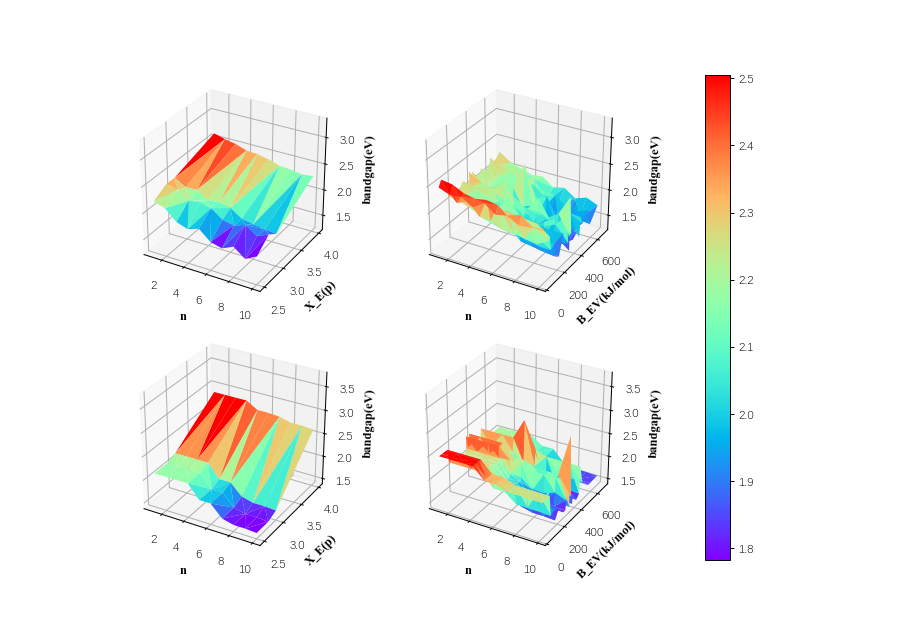

In [168]:

fig = plt.figure(figsize=(10,7))
plt.tight_layout(pad=20) #设置子图间隔
plt.subplots_adjust(hspace=0.1,wspace=0.2)

#设置横纵坐标的名称以及对应字体格式
font = {'family':'Times New Roman','weight':'normal','size':10}

#子图1
ax1 = fig.add_subplot(221,projection='3d')
x1= df3D['n'].tolist()
y1= df3D['X_E(p)'].tolist()
z1= svm_pred_HTS
#ax1 = fig.gca(projection='3d')
a = ax1.plot_trisurf(x1,y1,z1,cmap = plt.get_cmap('rainbow'))
#plt.colorbar(sc)
ax1.set_xlabel('n',font)
ax1.set_ylabel('X_E(p)',font)
ax1.set_zlabel('bandgap(eV)',font)


#子图2
ax2 = fig.add_subplot(222,projection='3d')
x2= df3D['n'].tolist()
y2= df3D['B_EV'].tolist()
z2= svm_pred_HTS
b=ax2.plot_trisurf(x2,y2,z2,cmap = plt.get_cmap('rainbow'))
#plt.colorbar(sc)
ax2.set_xlabel('n',font)
ax2.set_ylabel('B_EV(kJ/mol)',font)
ax2.set_zlabel('bandgap(eV)',font)

#子图3
ax3 = fig.add_subplot(223,projection='3d')
x3= df3D['n'].tolist()
y3= df3D['X_E(p)'].tolist()
z3= xgb_pred_HTS
c=ax3.plot_trisurf(x3,y3,z3,cmap = plt.get_cmap('rainbow'))
#plt.colorbar(sc)
ax3.set_xlabel('n',font)
ax3.set_ylabel('X_E(p)',font)
ax3.set_zlabel('bandgap(eV)',font)

#子图4
ax4 = fig.add_subplot(224,projection='3d')
x4= df3D['n'].tolist()
y4= df3D['B_EV'].tolist()
z4= xgb_pred_HTS
d=ax4.plot_trisurf(x4,y4,z4,cmap = plt.get_cmap('rainbow'))
#plt.colorbar(sc)
ax4.set_xlabel('n',font)
ax4.set_ylabel('B_EV(kJ/mol)',font)
ax4.set_zlabel('bandgap(eV)',font)

fig.colorbar(a,ax=[ax1,ax2,ax3,ax4],pad=0.1,shrink=1)
plt.show()


In [ ]:
#绘制两种算法的一个分布情况
plt.figure()
x1 = Y_train['n'].tolist()
y1 = Y_train['bandgap'].tolist()
x2 = Y_test['n'].tolist()
y2 = Y_test['bandgap'].tolist()
#plt.title("散点图")
plt.plot(x1,y1,".",marker=".",c="#9966ff",label="training set")
plt.plot(x2,y2,".",marker="*",c="#1199ff",label="test set")
plt.xlabel("$n$")
plt.ylabel("$bandgap$")
plt.xticks(range(1,11,1))
plt.legend(loc="upper right",frameon=False)
plt.show()